# STATISTICS

In [162]:
# import libraries
import os
import glob
import pandas as pd
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
import math
import xml.etree.ElementTree as ET
import seaborn as sns
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler

curfolder = os.getcwd()
print(curfolder)

flesh_folder = os.path.dirname(curfolder)
features = flesh_folder + '/Feature_Extraction_folder/feature_extraction_with2d.csv'

features = pd.read_csv(features)



/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/StatisticsFolder


# Normalize all the feature data

In [176]:

normed_features = features.copy()
# remove the entropy measures that calculate each arm separately
normed_features = normed_features.drop(['total_body_entropy2D', 'total_body_variability2D'], axis=1)
normed_features2 = features.copy()
normed_features = normed_features.replace([np.inf, -np.inf], 0)
normed_features2 = normed_features.replace([np.inf, -np.inf], 0)
normed_features
normed_features2[normed_features2.columns[16:]] = StandardScaler().fit_transform(normed_features[normed_features.columns[16:]])


# UMAP

In [177]:
import umap
reducer = umap.UMAP()

In [178]:
# create embeddings
embedding = reducer.fit_transform(normed_features2[normed_features2.columns[16:]])
embedding.shape
embeddings = pd.DataFrame(embedding)
features["X_embeddings"] = embeddings.iloc[:, 0]
features["Y_embeddings"] = embeddings.iloc[:, 1]
normed_features["X_embeddings"] = embeddings.iloc[:, 0]
normed_features["Y_embeddings"] = embeddings.iloc[:, 1]

/opt/anaconda3/envs/umap_env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


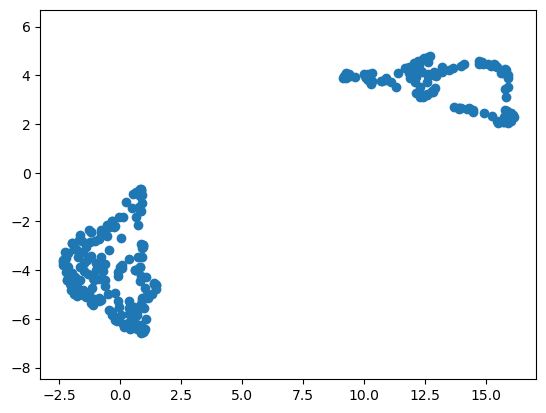

In [179]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
plt.gca().set_aspect('equal', 'datalim'))

Graph a specific gesture and its embeddings:

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

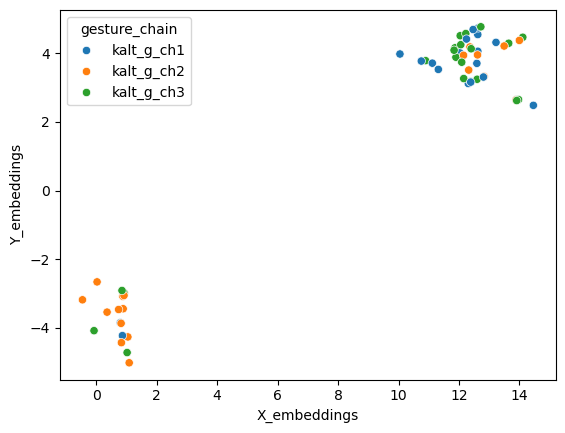

In [180]:
# graph a specific gesture and its differen't chains
specific = normed_features[normed_features['gesture'] == 'kalt']
sns.scatterplot(data=specific, x="X_embeddings", y="Y_embeddings", hue="gesture_chain")

graph all gestures and their embeddings:

<Axes: xlabel='X_embeddings', ylabel='Y_embeddings'>

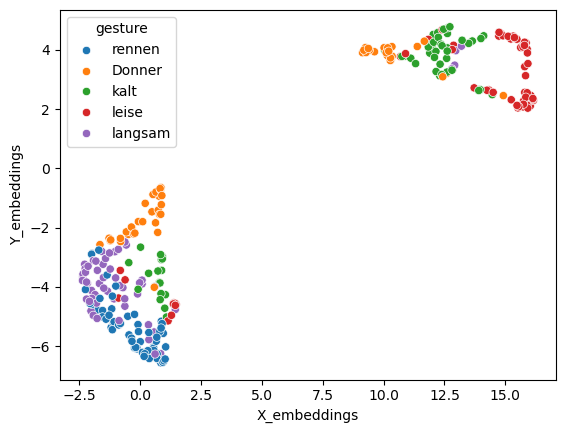

In [181]:
sns.scatterplot(data=normed_features, x="X_embeddings", y="Y_embeddings", hue="gesture")

In [133]:
normed_features

participantID   Age         BirthPlace            Gender NativeLanguages  \
0               52  21.0             Berlin    Man / Männlich         Deutsch   
1               23  35.0       Deutschland   Woman / Weiblich        Deutsch    
2                0   NaN                NaN               NaN             NaN   
3               16  27.0        Deutschland    Man / Männlich        Deutsch    
4               30  45.0            Dresden  Woman / Weiblich         Deutsch   
..             ...   ...                ...               ...             ...   
297             14  11.0             Berlin    Man / Männlich         Deutsch   
298             30  45.0            Dresden  Woman / Weiblich         Deutsch   
299             39  39.0             Berlin  Woman / Weiblich        Deutsch    
300             52  21.0             Berlin    Man / Männlich         Deutsch   
301             59  27.0  Deutschland, Gera  Woman / Weiblich         Deutsch   

     NumOfNativeLanguages                                    Other Languages  \
0                     1.0      Englisch- sehr gut, Italienisch - grundlegend   
1                     1.0  English (fluent), French (advanced), Italian (...   
2                     NaN                                                NaN   
3                     1.0                                            English   
4                     1.0                                           Englisch   
..                    ...                                                ...   
297                   1.0                                   Englisch (basic)   
298                   1.0                                           Englisch   
299                   1.0                     English fluent, Spanisch basic   
300                   1.0      Englisch- sehr gut, Italienisch - grundlegend   
301                   1.0  Englisch (gute Kenntnisse), französisch (Grund...   

     TotalLanguages  Extroversion                            Hand  ...  \
0               3.0          53.0  Right-handed / Rechtshänder*in  ...   
1               4.0          43.0  Right-handed / Rechtshänder*in  ...   
2               NaN           NaN                             NaN  ...   
3               2.0          30.0  Right-handed / Rechtshänder*in  ...   
4               2.0          51.0  Right-handed / Rechtshänder*in  ...   
..              ...           ...                             ...  ...   
297             2.0          40.0  Right-handed / Rechtshänder*in  ...   
298             2.0          51.0  Right-handed / Rechtshänder*in  ...   
299             3.0          41.0    Left-handed / Linkshänder*in  ...   
300             3.0          53.0  Right-handed / Rechtshänder*in  ...   
301             3.0          40.0  Right-handed / Rechtshänder*in  ...   

    right_knee_entropy2D left_knee_entropy2D  right_ankle_entropy2D  \
0               2.706465            2.648032               2.421757   
1               2.627848            2.469158               2.481004   
2               0.000000            0.000000               0.000000   
3               2.771422            2.383941               2.866857   
4               2.365650            2.258929               2.515995   
..                   ...                 ...                    ...   
297             2.857205            2.620304               2.870387   
298             2.686413            2.732264               2.716976   
299             2.698962            2.724901               2.591850   
300             0.000000            0.000000               0.000000   
301             2.814872            2.514212               2.835909   

     left_ankle_entropy2D total_body_entropy2Daggregated  \
0                2.242816                       2.509316   
1                2.197915                       2.217183   
2                0.000000                       1.977538   
3                2.857326                       2.729630   
4                2.369060    

# Set g0 for ch2 and 3


In [182]:
fix_row = normed_features[normed_features['fileID'] == "leise_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "leise_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'leise_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "leise_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "leise_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'leise_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "langsam_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "langsam_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'langsam_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "langsam_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "langsam_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'langsam_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "rennen_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "rennen_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'rennen_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "rennen_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "rennen_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'rennen_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "Donner_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "Donner_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'Donner_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "Donner_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "Donner_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'Donner_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "kalt_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "kalt_g_ch2_g0_compr.mp4"
fix_row["chainID"] = "ch2g0"
fix_row["chain_number"] = 2
fix_row["gesture_chain"] = 'kalt_g_ch2'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)

fix_row = normed_features[normed_features['fileID'] == "kalt_g_ch1_g0_compr.mp4"].copy()
fix_row["fileID"] = "kalt_g_ch3_g0_compr.mp4"
fix_row["chainID"] = "ch3g0"
fix_row["chain_number"] = 3
fix_row["gesture_chain"] = 'kalt_g_ch3'
normed_features = pd.concat([normed_features, fix_row], ignore_index=True)



# Save Normed Features Dataframe with Embeddings


In [183]:
globals()["normed_features"] = normed_features
globals()["normed_features"].to_csv(os.path.join(curfolder, f'{"normed_features"}.csv'), index=False)

In [184]:
normed_features

participantID   Age    BirthPlace            Gender NativeLanguages  \
0               52  21.0        Berlin    Man / Männlich         Deutsch   
1               23  35.0  Deutschland   Woman / Weiblich        Deutsch    
2                0   NaN           NaN               NaN             NaN   
3               16  27.0   Deutschland    Man / Männlich        Deutsch    
4               30  45.0       Dresden  Woman / Weiblich         Deutsch   
..             ...   ...           ...               ...             ...   
307              0   NaN           NaN               NaN             NaN   
308              0   NaN           NaN               NaN             NaN   
309              0   NaN           NaN               NaN             NaN   
310              0   NaN           NaN               NaN             NaN   
311              0   NaN           NaN               NaN             NaN   

     NumOfNativeLanguages                                    Other Languages  \
0                     1.0      Englisch- sehr gut, Italienisch - grundlegend   
1                     1.0  English (fluent), French (advanced), Italian (...   
2                     NaN                                                NaN   
3                     1.0                                            English   
4                     1.0                                           Englisch   
..                    ...                                                ...   
307                   NaN                                                NaN   
308                   NaN                                                NaN   
309                   NaN                                                NaN   
310                   NaN                                                NaN   
311                   NaN                                                NaN   

     TotalLanguages  Extroversion                            Hand  ...  \
0               3.0          53.0  Right-handed / Rechtshänder*in  ...   
1               4.0          43.0  Right-handed / Rechtshänder*in  ...   
2               NaN           NaN                             NaN  ...   
3               2.0          30.0  Right-handed / Rechtshänder*in  ...   
4               2.0          51.0  Right-handed / Rechtshänder*in  ...   
..              ...           ...                             ...  ...   
307             NaN           NaN                             NaN  ...   
308             NaN           NaN                             NaN  ...   
309             NaN           NaN                             NaN  ...   
310             NaN           NaN                             NaN  ...   
311             NaN           NaN                             NaN  ...   

    right_knee_entropy2D left_knee_entropy2D  right_ankle_entropy2D  \
0               2.706465            2.648032               2.421757   
1               2.627848            2.469158               2.481004   
2               0.000000            0.000000               0.000000   
3               2.771422            2.383941               2.866857   
4               2.365650            2.258929               2.515995   
..                   ...                 ...                    ...   
307             2.746202            2.625635               2.890544   
308             2.789368            2.553865               2.931074   
309             2.789368            2.553865               2.931074   
310             0.000000            0.000000               0.000000   
311             0.000000            0.000000               0.000000   

     left_ankle_entropy2D total_body_entropy2Daggregated  \
0                2.242816                       2.509316   
1                2.197915                       2.217183   
2                0.000000                       1.977538   
3                2.857326                       2.729630   
4                2.369060                       2.007070   
..                    ...    

# Euclidean Distances between Gestures

Comparing Two Vectors

In [185]:
# make sure to put normalized vectors into this function. 
def calculate_distances(feature_vector1, feature_vector2):
    squared_diff =np.square(feature_vector1-feature_vector2)
    sum_squared_diff = np.sum(squared_diff)
    eucl_distance = math.sqrt(sum_squared_diff)
    return eucl_distance

# feed in the dataframe that contains just the vector of features.
def calculate_distances_to_all(target_segment_index, array):
    target_segment = array[target_segment_index]
    distances = np.empty(array.shape[0])
    i = 0
    for row in array:
        distances[i] = calculate_distances(target_segment, row)
        i = i+1
    return distances


Comparing all vectors to each other and saving in a dataframe

In [186]:
interseg_dist = np.empty(normed_features[normed_features.columns[32:60]].shape)
interseg_dist = pd.DataFrame(interseg_dist)
interseg_dist = pd.DataFrame()
#make individual id for each segment
df_of_vectors = normed_features[normed_features.columns[32:60]].copy()
df_of_vectors = df_of_vectors.to_numpy()


# calculate distance between each segment
for i in range (normed_features[normed_features.columns[32:60]].shape[0]):
    id = normed_features.loc[i, 'fileID']
    interseg_dist_vector = calculate_distances_to_all(i, df_of_vectors)
    interseg_dist = interseg_dist.rename(index={i: id})
    interseg_dist = interseg_dist.rename(columns={i: id})
    interseg_dist[id] = interseg_dist_vector
    index = interseg_dist.index

# save to dataframe
interseg_dist.to_csv('interseg_dist.csv', index=True)
interseg_dist = pd.read_csv(os.path.join(curfolder, 'interseg_dist.csv')).set_index('Unnamed: 0')





# Create a big dataframe which compares participants to previous participants

In [187]:
# creates two arrays to track the x and y values (diff in age vs distance between gestures)
big_df = pd.DataFrame(index=range(61), columns=['participantID', 'generation_number', 'chain_number', 'chainID', 'age', 'extrovert', 'TotalLanguages', 'Gender', 'NumOfNativeLanguages', 'diff_in_age', 'diff_in_extrovert', 'diff_in_gender', 'diff_in_TotalNativeLanguages', 'diff_in_TotalLanguages',
                               'diff_in_gesture_space_Donner', 'diff_in_entropy_Donner', 'diff_in_variability_Donner',
                               'diff_in_gesture_space_kalt', 'diff_in_entropy_kalt', 'diff_in_variability_kalt',
                                 'diff_in_gesture_space_langsam', 'diff_in_entropy_langsam','diff_in_variability_langsam',
                                   'diff_in_gesture_space_leise', 'diff_in_entropy_leise', 'diff_in_variability_leise',
                                     'diff_in_gesture_space_rennen','diff_in_entropy_rennen', 'diff_in_variability_rennen',
                                       'diff_in_gesture_space_mean', 'diff_in_entropy_mean', 'diff_in_variability_mean', 
                                       'total_dist_Donner', 'total_dist_kalt' , 'total_dist_langsam', 'total_dist_leise', 'total_dist_rennen', 'total_dist_mean'])
big_df['participantID'] = big_df.index

# rename row zero which got messed up in the interseg_dist matrix
interseg_dist = interseg_dist.rename(index={str(0): 'rennen_g_ch3_g12_compr.mp4'})
for i in range(interseg_dist.shape[0]-1):

    # get the current gesture
    curr_gesture = interseg_dist.index[i]

    # get the row of features of the current gesture and aspects of the gesture
    curr_features_row = normed_features[normed_features['fileID'] == curr_gesture]
    gesture = curr_features_row["gesture"].iloc[0]
    generation_number = curr_features_row["generation_number"].iloc[0]
    generation_number = generation_number.astype(int)

    # if the current gesture is seed zero, go to the next iteration
    if generation_number == 0:
        continue
    chain_number = curr_features_row["chain_number"].iloc[0]
    chain_number =chain_number.astype(int)
    chainID = curr_features_row["chainID"].iloc[0]
    participantID_curr = curr_features_row["participantID"].iloc[0]

    # get the previous gesture
    previous_gesture = gesture + "_g_ch" + str(chain_number) + "_g" + str((generation_number)-1) + "_compr.mp4"

    # if either of the gestures are the ones we don't have video for, skip this iteration
    if curr_gesture == "rennen_g_ch1_g17_compr.mp4" or curr_gesture == "langsam_g_ch2_g8_compr.mp4" or curr_gesture == "langsam_g_ch2_g19_compr.mp4" or previous_gesture== "rennen_g_ch1_g17_compr.mp4" or previous_gesture == "langsam_g_ch2_g8_compr.mp4" or previous_gesture== "langsam_g_ch2_g19_compr.mp4":
        continue

    prev_features_row = normed_features[normed_features['fileID'] == previous_gesture]

    ## adding information about the current gesture:
    big_df.loc[participantID_curr, 'generation_number'] = generation_number
    big_df.loc[participantID_curr, 'chain_number'] = chain_number
    big_df.loc[participantID_curr, 'chainID'] = chainID


    #### COMPARING DISTANCES ######
    # get the overall distances between the two gestures and add it to the correct cell 
    distance = interseg_dist.loc[previous_gesture, curr_gesture]
    big_df.loc[participantID_curr, 'total_dist_' + gesture] =distance
    # get the difference between gesture spaces and the current gesture space
    gesture_space_diff = abs(curr_features_row["total_gesture_space2D"].iloc[0] - prev_features_row["total_gesture_space2D"].iloc[0])
    big_df.loc[participantID_curr, 'diff_in_gesture_space_' + gesture] =gesture_space_diff
    big_df.loc[participantID_curr, 'gesture_space_' + gesture] = curr_features_row["total_gesture_space2D"].iloc[0]
     # get the difference between entrophies and the current entropy
    entropy_diff = abs(curr_features_row["total_body_entropy2Daggregated"].iloc[0] - prev_features_row["total_body_entropy2Daggregated"].iloc[0])
    big_df.loc[participantID_curr, 'diff_in_entropy_' + gesture] = entropy_diff
    big_df.loc[participantID_curr, 'entropy_' + gesture] = curr_features_row["total_body_entropy2Daggregated"].iloc[0]
    # # get the difference between variabilities and the current variabilities
    variability_diff = abs(curr_features_row["total_body_variability2Daggregated"].iloc[0] - prev_features_row["total_body_variability2Daggregated"].iloc[0])
    big_df.loc[participantID_curr, 'diff_in_variability_' + gesture] = variability_diff
    big_df.loc[participantID_curr, 'variability_' + gesture] = curr_features_row["total_body_variability2Daggregated"].iloc[0]     

    ### COMPARING DEMOGRAPHICS ######
    #ignore the ones that we don't have participant data for
    #if participantID_curr == 17 or participantID_curr == 40 or participantID_curr == 20 or participantID_curr == 21 or participantID_curr == 22 or participantID_curr == 26:
    #    continue


    # if age hasn't been filled in yet:
    #if (big_df[big_df['participantID'] == participantID_curr]['age']).isna:
    if pd.isna(big_df.loc[big_df['participantID'] == participantID_curr, 'age'].iloc[0]):
    #if (big_df[big_df['participantID'] == participantID_curr]['age']).isna:
        #get the distance between the ages
        previous_age = prev_features_row["Age"].iloc[0]
        curr_age = curr_features_row["Age"].iloc[0]
        big_df.loc[participantID_curr, 'age'] = curr_age
        # if we don't know the ages, skip this iteration
        if math.isnan(previous_age) or math.isnan(curr_age):
            continue
    #get the difference in ages
        diff_in_age = int(abs(curr_age - previous_age))
        big_df.loc[participantID_curr, 'diff_in_age'] = diff_in_age

    #get the difference in extroversion
    if pd.isna(big_df.loc[big_df['participantID'] == participantID_curr, 'extrovert'].iloc[0]):
        previous_extrovert = prev_features_row["Extroversion"].iloc[0]
        curr_extrovert = curr_features_row["Extroversion"].iloc[0]
        big_df.loc[participantID_curr, 'extrovert'] = curr_extrovert
        # if we don't know the extroversion, skip this iteration
        if math.isnan(previous_extrovert) or math.isnan(curr_extrovert):
            continue
        #get the difference in extroversion
        diff_in_extrovert = int(abs(curr_extrovert - previous_extrovert))
        big_df.loc[participantID_curr, 'diff_in_extrovert'] = diff_in_extrovert

    if pd.isna(big_df.loc[big_df['participantID'] == participantID_curr, 'TotalLanguages'].iloc[0]):
    #if (big_df[big_df['participantID'] == participantID_curr]['age']).isna:
        #get the distance between the ages
        previous_langs = prev_features_row["TotalLanguages"].iloc[0]
        curr_langs = curr_features_row["TotalLanguages"].iloc[0]
        big_df.loc[participantID_curr, 'TotalLanguages'] = curr_langs
        # if we don't know the ages, skip this iteration
        if math.isnan(previous_langs) or math.isnan(curr_langs):
            continue
    #get the difference in ages
        diff_in_TotalLanguages = int(abs(curr_langs - previous_langs))
        big_df.loc[participantID_curr, 'diff_in_TotalLanguages'] = diff_in_TotalLanguages

    if pd.isna(big_df.loc[big_df['participantID'] == participantID_curr, 'NumOfNativeLanguages'].iloc[0]):
        #get the distance between the ages
        previous_Nlangs = prev_features_row["NumOfNativeLanguages"].iloc[0]
        curr_Nlangs = curr_features_row["NumOfNativeLanguages"].iloc[0]
        big_df.loc[participantID_curr, 'NumOfNativeLanguages'] = curr_Nlangs
        # if we don't know the ages, skip this iteration
        if math.isnan(previous_Nlangs) or math.isnan(curr_Nlangs):
            continue
    #get the difference in native languages
        diff_in_TotalNativeLanguages = int(abs(curr_Nlangs - previous_Nlangs))
        big_df.loc[participantID_curr, 'diff_in_TotalNativeLanguages'] = diff_in_TotalNativeLanguages

    if pd.isna(big_df.loc[big_df['participantID'] == participantID_curr, 'Gender'].iloc[0]):
    #if (big_df[big_df['participantID'] == participantID_curr]['age']).isna:
        #get the distance between the ages
        previous_gender = prev_features_row["Gender"].iloc[0]
        curr_gender = curr_features_row["Gender"].iloc[0]
        big_df.loc[participantID_curr, 'Gender'] = curr_gender
        # if we don't know the ages, skip this iteration
        if math.isnan(previous_Nlangs) or math.isnan(curr_Nlangs):
            continue
    #get the difference in gender (0 means no difference, 1 means difference)

        diff_in_Gender = int(previous_gender != curr_gender)
        big_df.loc[participantID_curr, 'diff_in_gender'] = diff_in_Gender


    ### store demographic information in this big dataframe so that I can see whether youger people change their gestures more than older people


# FINDING THE MEAN DIFFERENCES
big_df['diff_in_gesture_space_mean'] = big_df[['diff_in_gesture_space_Donner', 'diff_in_gesture_space_kalt', 'diff_in_gesture_space_langsam', 'diff_in_gesture_space_leise', 'diff_in_gesture_space_rennen']].mean(axis=1)
big_df['diff_in_entropy_mean'] = big_df[['diff_in_entropy_Donner', 'diff_in_entropy_kalt', 'diff_in_entropy_langsam', 'diff_in_entropy_leise', 'diff_in_entropy_rennen']].mean(axis=1)
big_df['diff_in_variability_mean'] = big_df[['diff_in_variability_Donner', 'diff_in_variability_kalt', 'diff_in_variability_langsam', 'diff_in_variability_leise', 'diff_in_variability_rennen']].mean(axis=1)
big_df['total_dist_mean'] = big_df[['total_dist_Donner', 'total_dist_kalt', 'total_dist_langsam', 'total_dist_leise', 'total_dist_rennen']].mean(axis=1)

# FINDING THE MEAN FEATURES
big_df['gesture_space_mean'] = big_df[['gesture_space_Donner', 'gesture_space_kalt', 'gesture_space_langsam', 'gesture_space_leise', 'gesture_space_rennen']].mean(axis=1)
big_df['entropy_mean'] = big_df[['entropy_Donner', 'entropy_kalt', 'entropy_langsam', 'entropy_leise', 'entropy_rennen']].mean(axis=1)
big_df['variability_mean'] = big_df[['variability_Donner', 'variability_kalt', 'variability_langsam', 'variability_leise', 'variability_rennen']].mean(axis=1)

# Saving to Csv File
globals()["big_df"] = big_df
globals()["big_df"].to_csv(os.path.join(curfolder, f'{"gesture_to_prev_gesture"}.csv'), index=False)


In [188]:
# create a final dataframe with everything that I need to perform statistics: 
final_dataframe = normed_features[['participantID', 'Age', 'Gender', 'NumOfNativeLanguages', 'TotalLanguages', 'Extroversion', 'fileID', 'chainID', 'generation_number', 'chain_number', 'gesture', 'gesture_chain', 'total_gesture_space2D', 'total_body_entropy2Daggregated', 'total_body_variability2Daggregated', 'X_embeddings', 'Y_embeddings']].copy()

for index, row in final_dataframe.iterrows():
    participantID = row['participantID']
    gesture = row['gesture']
    #final_dataframe.loc[index, "generation_number"] = (curr_row['generation_number'].iloc[0])+1
    #print((final_dataframe.loc[index, "generation_number"]))
    final_dataframe.loc[index, "generation_number"] = (final_dataframe.loc[index, "generation_number"]) + 1
    curr_row = big_df[big_df["participantID"] == participantID]
    # find the total distance between this gesture and the previous gesture
    final_dataframe.loc[index, 'total_distance'] = curr_row['total_dist_' + gesture].iloc[0]
    # find the diff_in_gesture_space between this gesture and the previous gesture
    final_dataframe.loc[index, 'diff_in_gesture_space'] = curr_row['diff_in_gesture_space_' + gesture].iloc[0]
    # find the diff_in_entropy between this gesture and the previous gesture 
    final_dataframe.loc[index, 'diff_in_entropy'] = curr_row['diff_in_entropy_' + gesture].iloc[0]
    # find the diff_in_variability between this gesture and the previous gesture 
    final_dataframe.loc[index, 'diff_in_variability'] = curr_row['diff_in_variability_' + gesture].iloc[0]
    # find the difference in age an extroversion between this participant and the previous
    final_dataframe.loc[index, 'diff_in_age'] = curr_row['diff_in_age'].iloc[0]
    final_dataframe.loc[index, 'diff_in_extrovet'] = curr_row['diff_in_extrovert'].iloc[0]
    final_dataframe.loc[index, 'diff_in_gender'] = curr_row['diff_in_gender'].iloc[0]
    final_dataframe.loc[index, 'diff_in_TotalLanguages'] = curr_row['diff_in_TotalLanguages'].iloc[0]
    final_dataframe.loc[index, 'diff_in_TotalNativeLanguages'] = curr_row['diff_in_TotalNativeLanguages'].iloc[0]

    # get the categorical age
    #print(curr_row)
    Age = curr_row["age"].iloc[0]
    age_category = ""
    if Age < 12:
        age_category = "Gen_Alpha"
    if Age >= 12 and Age <28:
        age_category = "Gen_Z"
    if Age >= 28 and Age <45:
        age_category = "Millenial"
    if Age >= 45 and Age <60:
        age_category = "GenX"
    if Age >= 60 and Age <78:
        age_category = "Baby_Boomer"
    if Age >=78:
        age_category = "Silent_Gen"

    final_dataframe.loc[index, 'Age_category'] = age_category

    extrovert = curr_row["extroversion"].iloc[0]
    extrovert_category = ""
    if extrovert < 50:
        extrovert_category = "Introvert"
    if Age >= 50:
        extrovert_category = "Extrovert"

    final_dataframe.loc[index, 'Extrovert_category'] = extrovert_category

globals()["final_dataframe"] = final_dataframe
globals()["final_dataframe"].to_csv(os.path.join(curfolder, f'{"final_stats_dataframe"}.csv'), index=False)

In [189]:
final_dataframe

participantID   Age            Gender  NumOfNativeLanguages  \
0               52  21.0    Man / Männlich                   1.0   
1               23  35.0  Woman / Weiblich                   1.0   
2                0   NaN               NaN                   NaN   
3               16  27.0    Man / Männlich                   1.0   
4               30  45.0  Woman / Weiblich                   1.0   
..             ...   ...               ...                   ...   
307              0   NaN               NaN                   NaN   
308              0   NaN               NaN                   NaN   
309              0   NaN               NaN                   NaN   
310              0   NaN               NaN                   NaN   
311              0   NaN               NaN                   NaN   

     TotalLanguages  Extroversion                      fileID chainID  \
0               3.0          53.0  rennen_g_ch3_g12_compr.mp4  ch3g12   
1               4.0          43.0   Donner_g_ch2_g3_compr.mp4   ch2g3   
2               NaN           NaN     kalt_g_ch1_g0_compr.mp4   ch1g0   
3               2.0          30.0  Donner_g_ch1_g16_compr.mp4  ch1g16   
4               2.0          51.0    kalt_g_ch2_g10_compr.mp4  ch2g10   
..              ...           ...                         ...     ...   
307             NaN           NaN   rennen_g_ch3_g0_compr.mp4   ch3g0   
308             NaN           NaN   Donner_g_ch2_g0_compr.mp4   ch2g0   
309             NaN           NaN   Donner_g_ch3_g0_compr.mp4   ch3g0   
310             NaN           NaN     kalt_g_ch2_g0_compr.mp4   ch2g0   
311             NaN           NaN     kalt_g_ch3_g0_compr.mp4   ch3g0   

     generation_number  chain_number  ... total_distance  \
0                 13.0           3.0  ...     626.672590   
1                  4.0           2.0  ...     832.732748   
2                  1.0           1.0  ...            NaN   
3                 17.0           1.0  ...     277.438033   
4                 11.0           2.0  ...    1673.643935   
..                 ...           ...  ...            ...   
307                1.0           3.0  ...            NaN   
308                1.0           2.0  ...            NaN   
309                1.0           3.0  ...            NaN   
310                1.0           2.0  ...            NaN   
311                1.0           3.0  ...            NaN   

    diff_in_gesture_space  diff_in_entropy  diff_in_variability  diff_in_age  \
0                0.250485         0.859646           410.194525          0.0   
1                0.395958         0.430087           212.480506         24.0   
2                     NaN              NaN                  NaN          NaN   
3                0.118965         0.057398            67.792871         17.0   
4                0.196366         0.715204          1124.413427         24.0   
..                    ...              ...                  ...          ...   
307                   NaN              NaN                  NaN          NaN   
308                   NaN              NaN                  NaN          NaN   
309                   NaN              NaN                  NaN          NaN   
310                   NaN              NaN                  NaN          NaN   
311                   NaN              NaN                  NaN          NaN   

     diff_in_extrovet  diff_in_gender  diff_in_TotalLanguages  \
0                 7.0             0.0                     1.0   
1                26.0             0.0                     1.0   
2                 NaN             NaN                     NaN   
3                40.0             1.0                     3.0   
4                 6.0             0.0                     2.0   
..                ...             ...                     ...   
307               NaN             NaN                     NaN   
308               NaN             NaN                     NaN   
309               NaN             NaN       

# Open the Distance Folder and Do Statistics

In [1]:
interseg_dist = pd.read_csv(os.path.join(curfolder, 'interseg_dist.csv')).set_index('Unnamed: 0')
normed_features = pd.read_csv(os.path.join(curfolder, 'normed_features.csv'))
big_df = pd.read_csv(os.path.join(curfolder, 'gesture_to_prev_gesture.csv'))
final_stats = pd.read_csv(os.path.join(curfolder, 'final_stats_dataframe.csv'))

NameError: name 'pd' is not defined

## How does the efficiency measure of gesture space change over the a chain?

Donner:

<Axes: xlabel='generation_number', ylabel='gesture_space_Donner'>

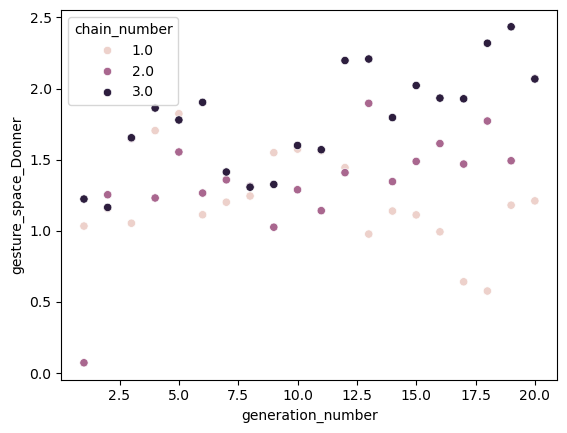

In [51]:
sns.scatterplot(data=big_df, x="generation_number", y="gesture_space_Donner", hue = 'chain_number')

<Axes: xlabel='generation_number', ylabel='gesture_space_kalt'>

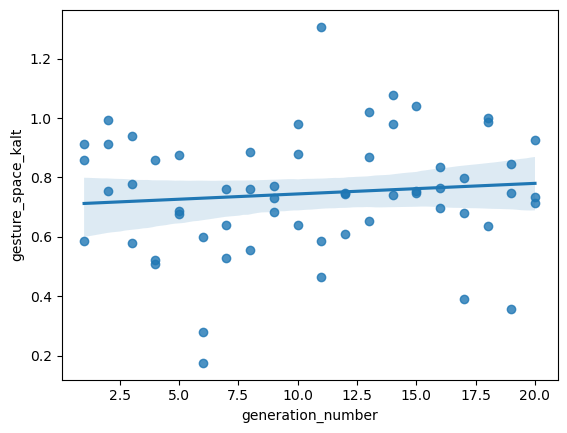

In [52]:
sns.regplot(data=big_df, x="generation_number", y="gesture_space_kalt")

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

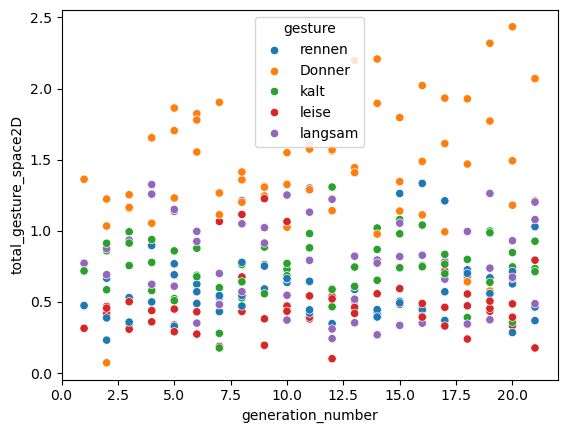

In [53]:
sns.scatterplot(data=final_stats, x="generation_number", y="total_gesture_space2D", hue="gesture")

In [ ]:
final_stats

In [28]:
filtered_df = final_stats[final_stats["gesture"] == 'leise']

# Calculate the standard deviation of the 'total_gesture_sapce2D' column for the filtered data
std_dev = filtered_df["total_body_entropy2Daggregated"].std()

# Print the result
print(f"Standard deviation of total gesture space for 'langsam': {std_dev}")

Standard deviation of total gesture space for 'langsam': 0.5112077029663343


<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

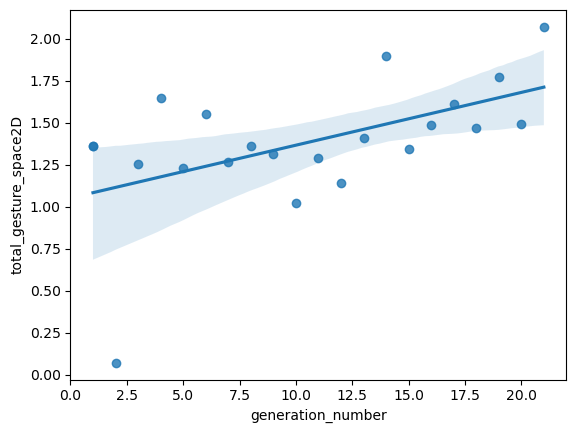

In [55]:
#sns.regplot(data=normed_features[normed_features["gesture_chain"] == 'Donner_g_ch3'], x="generation_number", y="total_gesture_space2D", order =1)
#sns.regplot(data=big_df[big_df["chain_number"] == 3], x="generation_number", y="gesture_space_Donner", order =1)
#sns.regplot(data=(final_stats[final_stats["chain_number"] == 3])[final_stats["gesture"]=="Donner"], x="generation_number", y="total_gesture_space2D", order =1)

filtered_data = final_stats[(final_stats["chain_number"] == 2) & (final_stats["gesture"] == "Donner")]
sns.regplot(data=filtered_data, x="generation_number", y="total_gesture_space2D", order=1)

Leise:

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

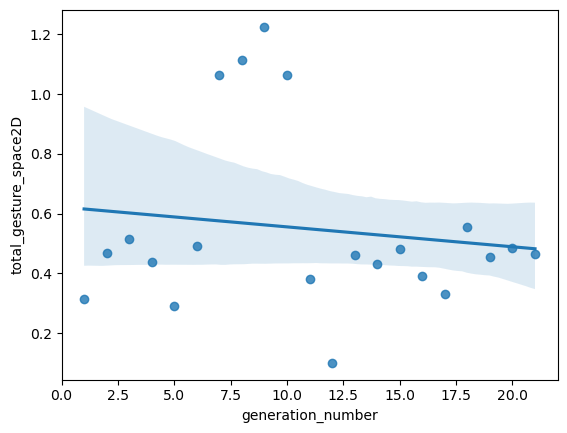

In [53]:
#sns.regplot(data=normed_features[normed_features["gesture_chain"] == 'kalt_g_ch3'], x="generation_number", y="total_gesture_space2D", order =1)
#sns.regplot(data=big_df[big_df["chain_number"] == 3], x="generation_number", y="gesture_space_kalt", order =1)
filtered_data = final_stats[(final_stats["chain_number"] == 3) & (final_stats["gesture"] == "leise")]
sns.regplot(data=filtered_data, x="generation_number", y="total_gesture_space2D", order=1)

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

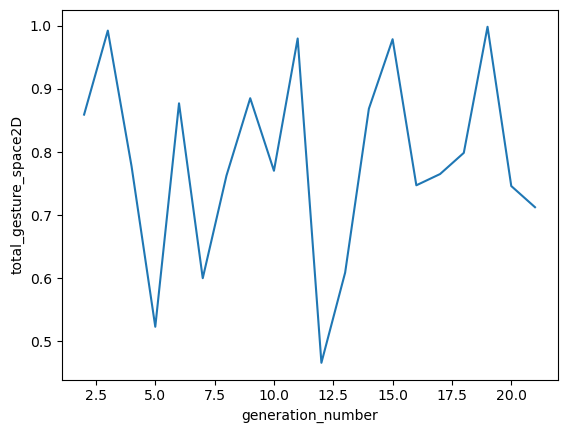

In [64]:
#sns.lineplot(data=normed_features[normed_features["gesture_chain"] == 'kalt_g_ch3'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')
#sns.lineplot(data=big_df[big_df["chain_number"] == 3], x="generation_number", y="gesture_space_kalt")
filtered_data = final_stats[(final_stats["chain_number"] == 3) & (final_stats["gesture"] == "kalt")]
sns.lineplot(data=filtered_data, x="generation_number", y="total_gesture_space2D")


<Axes: xlabel='generation_number', ylabel='gesture_space_leise'>

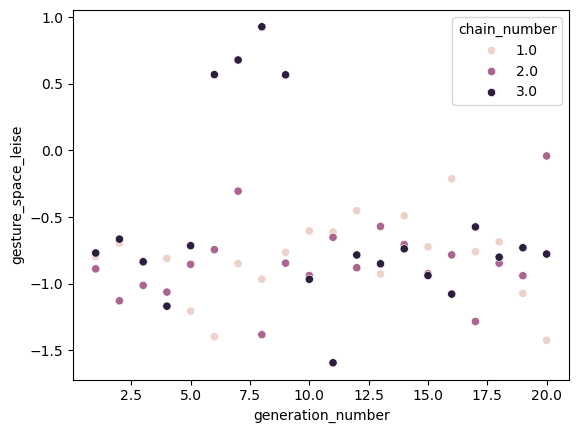

In [34]:
#sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')
sns.scatterplot(data=big_df, x="generation_number", y="gesture_space_leise", hue = 'chain_number')

kalt

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

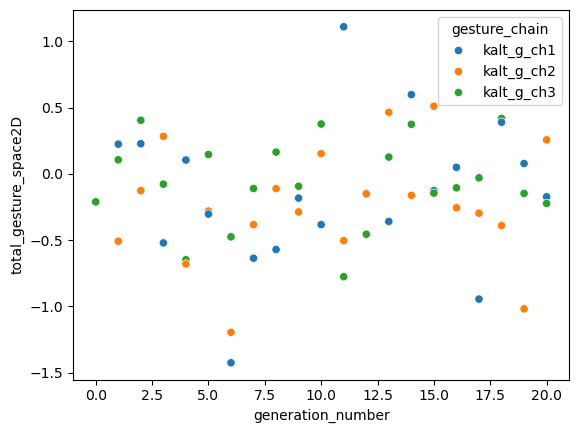

In [35]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'kalt'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')

langsam:

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

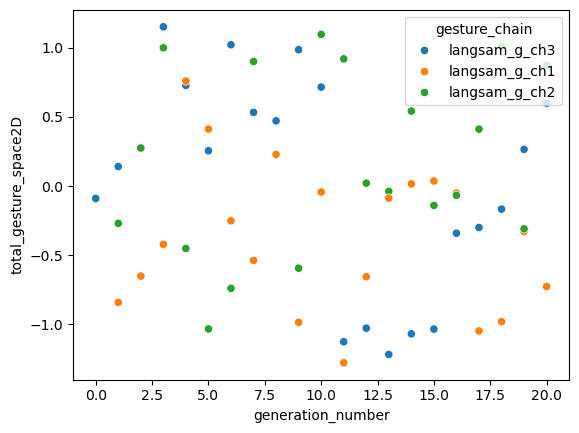

In [36]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'langsam'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')

rennen:

<Axes: xlabel='generation_number', ylabel='total_gesture_space2D'>

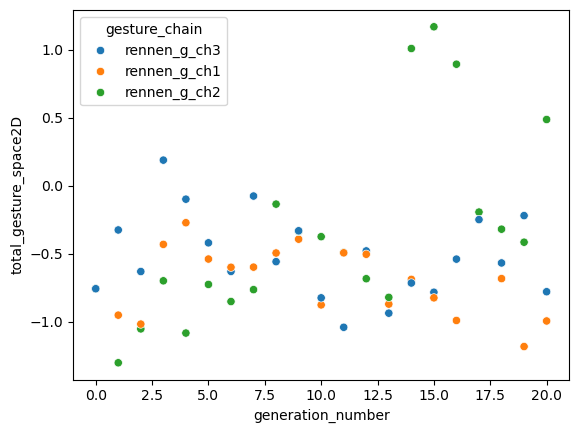

In [37]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'rennen'], x="generation_number", y="total_gesture_space2D", hue = 'gesture_chain')

# Does a bigger difference in age lead to a bigger difference in gesture? Does a bigger difference in extroversion lead to a bigger difference in gesture?

In [22]:
#interseg_dist = pd.read_csv(os.path.join(curfolder, 'interseg_dist.csv')).set_index('Unnamed: 0')
#normed_features = pd.read_csv(os.path.join(curfolder, 'normed_features.csv'))

#interseg_dist = interseg_dist.rename(index={0: 'rennen_g_ch3_g12_compr.mp4'})
print(interseg_dist.head)

<bound method NDFrame.head of                             rennen_g_ch3_g12_compr.mp4  \
Unnamed: 0                                               
0                                             0.000000   
Donner_g_ch2_g3_compr.mp4                  1327.164066   
kalt_g_ch1_g0_compr.mp4                     578.524707   
Donner_g_ch1_g16_compr.mp4                  207.326111   
kalt_g_ch2_g10_compr.mp4                    985.140988   
...                                                ...   
rennen_g_ch3_g0_compr.mp4                   487.477817   
Donner_g_ch2_g0_compr.mp4                   344.294947   
Donner_g_ch3_g0_compr.mp4                   344.294947   
kalt_g_ch2_g0_compr.mp4                     578.524707   
kalt_g_ch3_g0_compr.mp4                     578.524707   

                            Donner_g_ch2_g3_compr.mp4  \
Unnamed: 0                                              
0                                         1327.164066   
Donner_g_ch2_g3_compr.mp4                   

In [23]:
big_df

participantID  generation_number  chain_number chainID   age  extrovert  \
0               0                NaN           NaN     NaN   NaN        NaN   
1               1                1.0           1.0   ch1g1  26.0       40.0   
2               2                2.0           1.0   ch1g2  24.0       17.0   
3               3                3.0           1.0   ch1g3  32.0       60.0   
4               4                4.0           1.0   ch1g4  60.0       86.0   
..            ...                ...           ...     ...   ...        ...   
56             56               16.0           3.0  ch3g16  21.0       80.0   
57             57               17.0           3.0  ch3g17  50.0       30.0   
58             58               18.0           3.0  ch3g18  28.0       60.0   
59             59               19.0           3.0  ch3g19  27.0       40.0   
60             60               20.0           3.0  ch3g20  35.0       85.0   

    diff_in_age  diff_in_extrovert  diff_in_gesture_space_Donner  \
0           NaN                NaN                           NaN   
1           NaN                NaN                      0.329175   
2           2.0               23.0                      0.123387   
3           8.0               43.0                      0.103401   
4          28.0               26.0                      0.651023   
..          ...                ...                           ...   
56          1.0               50.0                      0.088618   
57         29.0               50.0                      0.004934   
58         22.0               30.0                      0.390736   
59          1.0               20.0                      0.115617   
60          8.0               45.0                      0.366975   

    diff_in_entropy_Donner  ...  variability_kalt  gesture_space_leise  \
0                      NaN  ...               NaN                  NaN   
1                 0.017366  ...          0.000000             0.456286   
2                 0.145192  ...       1883.333333             0.501427   
3                 0.161479  ...       1057.827963             0.443074   
4                 0.010843  ...        472.737481             0.449742   
..                     ...  ...               ...                  ...   
56                0.176746  ...          0.000000             0.330521   
57                0.094515  ...       1658.333333             0.555620   
58                0.217632  ...       1466.561444             0.454278   
59                0.329209  ...          0.000000             0.485795   
60                0.875618  ...       2578.771360             0.464750   

    entropy_leise  variability_leise  gesture_space_langsam  entropy_langsam  \
0             NaN                NaN                    NaN              NaN   
1        1.286907           0.000000               0.436433         2.777385   
2        1.512318           0.000000               0.521124         2.854343   
3        2.395766         564.025709               0.623571         2.833091   
4        1.946220         567.352526               1.150144         2.819873   
..            ...                ...                    ...              ...   
56       1.035444        3400.000000               0.659640         2.585897   
57       1.403411           0.000000               0.677979         2.619857   
58       1.701370        1250.000000               0.737243         2.782059   
59       2.016508           0.000000               0.930053         2.706516   
60       0.992196           0.000000               1.078601         2.761736   

    variability_langsam  gesture_space_mean  entropy_mean  variability_mean  
0                   NaN                 NaN           NaN               NaN  
1             38.873013            0.645021      2.328244        121.252577  
2            239.768407            0.690096      2.330949        534.952263  
3            104.668790            0.663718      2.583010        397.356964 

Graph diff in age vs gesture distance

# THIS GRAPH ANSWERS THE QUESTION: DOES AGE AFFECT HOW MUCH YOU CHANGE THE GESTURE?

<Axes: xlabel='age', ylabel='diff_in_gesture_space_mean'>

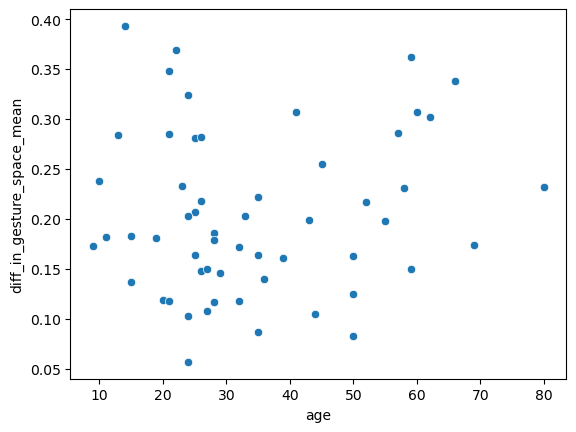

In [24]:
sns.scatterplot(data=big_df, x="age", y="diff_in_gesture_space_mean")

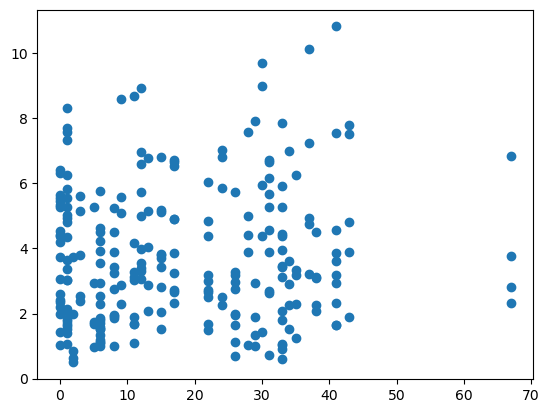

In [155]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(diff_in_age_array, diff_in_dist_array, 'o')
plt.show()

<Axes: xlabel='diff_in_age', ylabel='diff_in_gesture_space_mean'>

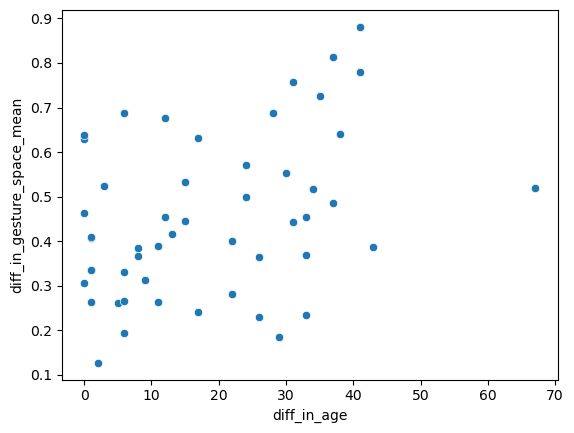

In [121]:
sns.scatterplot(data=big_df, x="diff_in_age", y="diff_in_gesture_space_mean")

Graph diff in extroversion vs gesture distance

<Axes: xlabel='diff_in_extrovert', ylabel='total_dist_mean'>

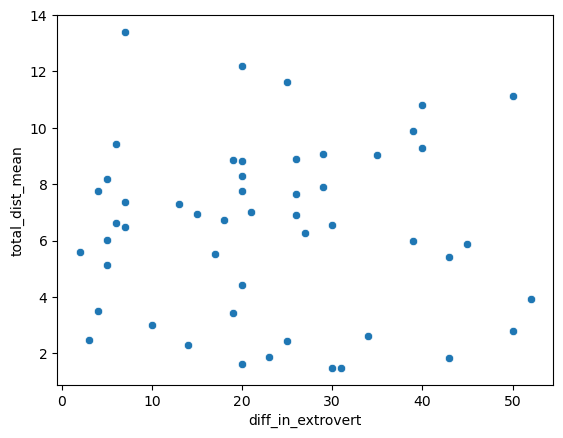

In [123]:
sns.scatterplot(data=big_df, x="diff_in_extrovert", y="total_dist_mean")

# Does age correlate with gesture size? (Should I separate this graph by gesture type?)

In [ ]:
normed_features

<Axes: xlabel='Age', ylabel='total_gesture_space2D'>

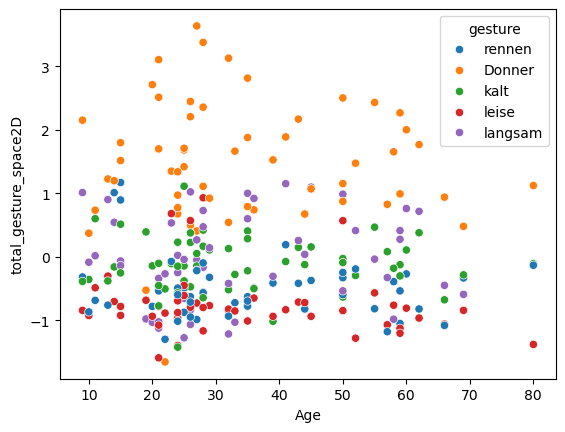

In [125]:
sns.scatterplot(data=normed_features, x="Age", y="total_gesture_space2D", hue = 'gesture')

# Does extroversion correlate with gesture size?

rennen:

<Axes: xlabel='Extroversion', ylabel='total_gesture_space2D'>

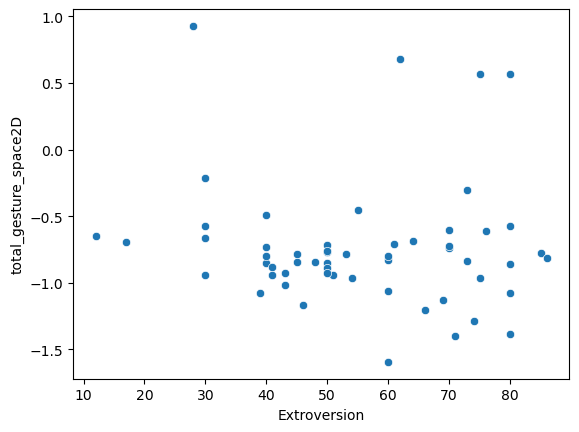

In [127]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], x="Extroversion", y="total_gesture_space2D")

leise:

<Axes: xlabel='Extroversion', ylabel='total_gesture_space2D'>

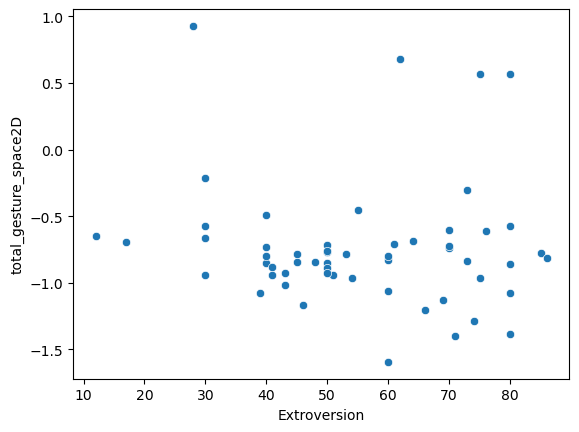

In [128]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], x="Extroversion", y="total_gesture_space2D")

langsam:

<Axes: xlabel='Extroversion', ylabel='total_gesture_space2D'>

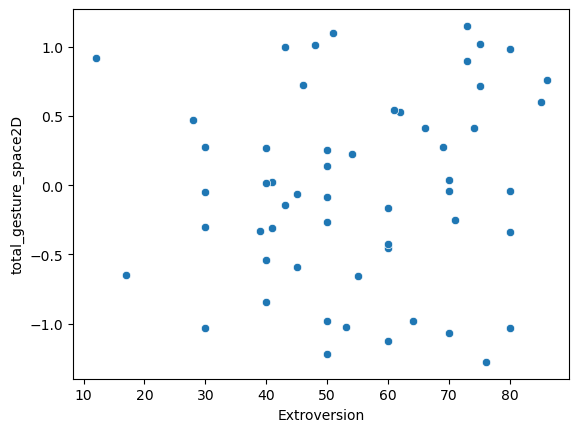

In [129]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'langsam'], x="Extroversion", y="total_gesture_space2D")

Donner:

<Axes: xlabel='Extroversion', ylabel='total_gesture_space2D'>

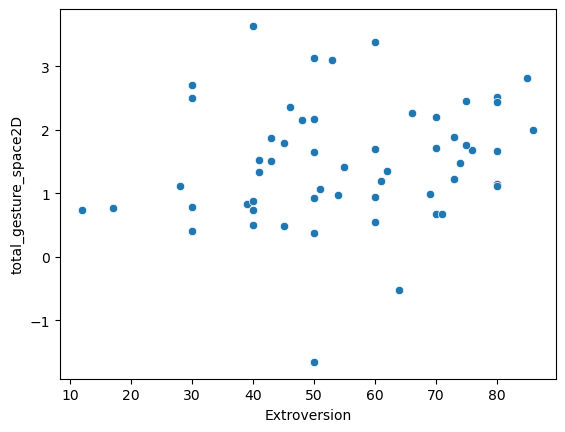

In [130]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'Donner'], x="Extroversion", y="total_gesture_space2D")

Kalt:

<Axes: xlabel='Extroversion', ylabel='total_gesture_space2D'>

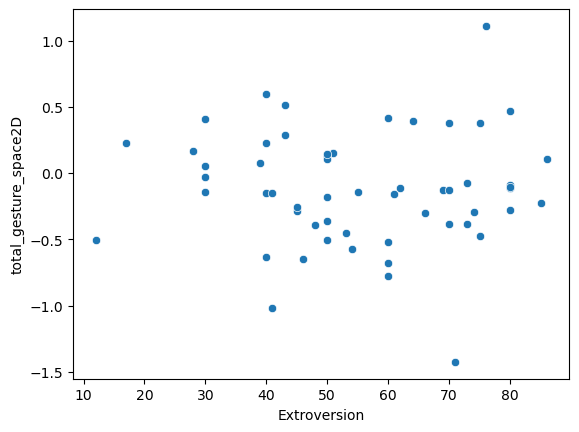

In [131]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'kalt'], x="Extroversion", y="total_gesture_space2D")

In [25]:
final_stats_dataframe = pd.read_csv(curfolder + "/final_stats_dataframe.csv")
final_stats_dataframe
min_value_A = final_stats_dataframe[final_stats_dataframe['total_body_variability2D'] != 0]['total_body_variability2D'].min()

In [26]:
print(min_value_A)

41.66666666670767


## FINAL RESULTS SECTION GRAPH

In [2]:
import os
import glob
import pandas as pd
import numpy as np
import math

import scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import math

import xml.etree.ElementTree as ET

import seaborn as sns
import seaborn.objects as so

curfolder = os.getcwd()
print(curfolder)

flesh_folder = os.path.dirname(curfolder)

/Users/gillianrosenberg/Documents/GitHub/FLESH_IteratedLearning/StatisticsFolder


In [3]:
interseg_dist = pd.read_csv(os.path.join(curfolder, 'interseg_dist.csv')).set_index('Unnamed: 0')
normed_features = pd.read_csv(os.path.join(curfolder, 'normed_features.csv'))
big_df = pd.read_csv(os.path.join(curfolder, 'gesture_to_prev_gesture.csv'))
final_stats = pd.read_csv(os.path.join(curfolder, 'final_stats_dataframe.csv'))

# general trends to show that we don't imitate perfectly

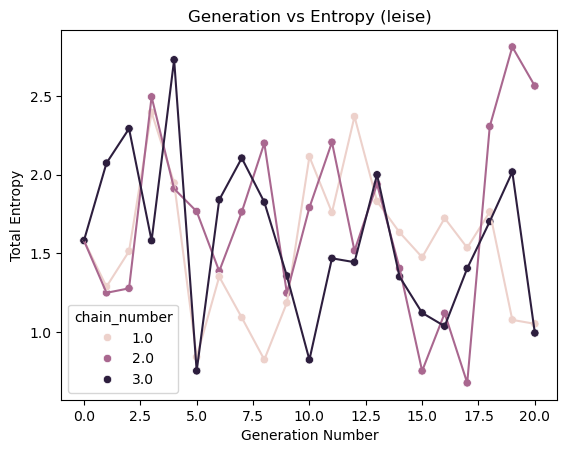

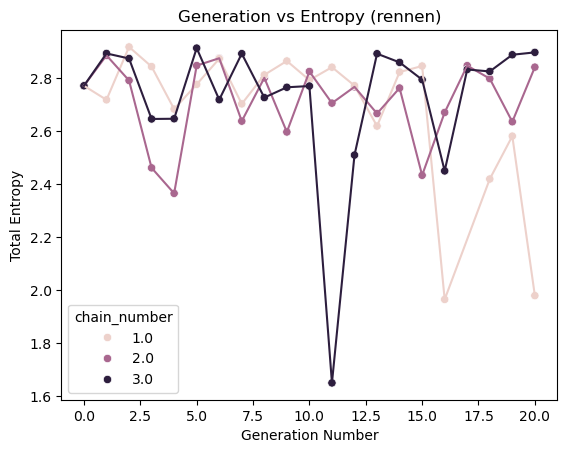

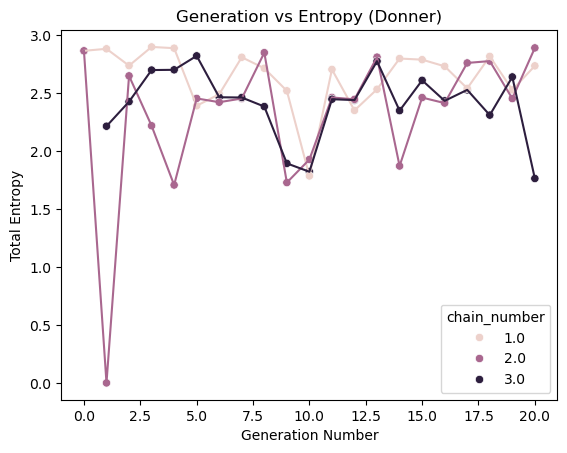

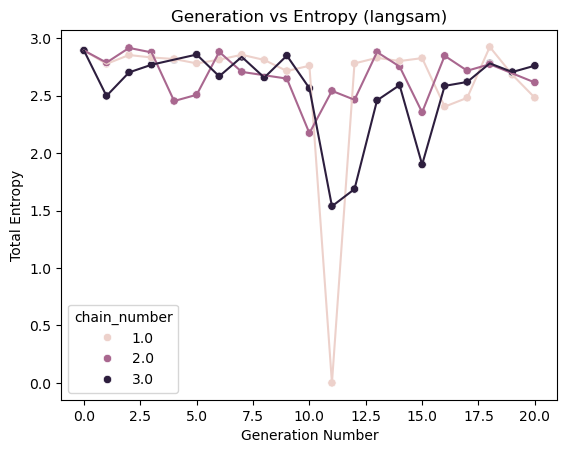

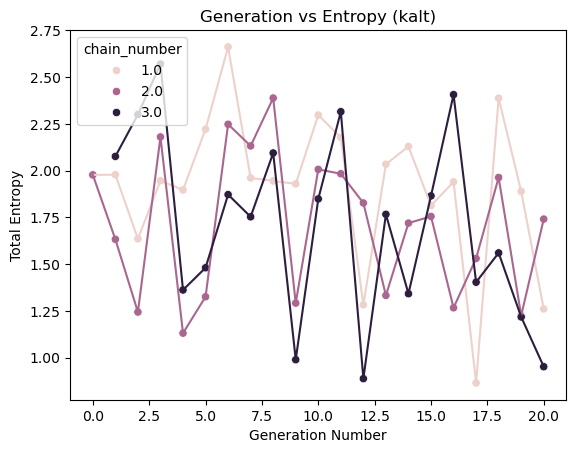

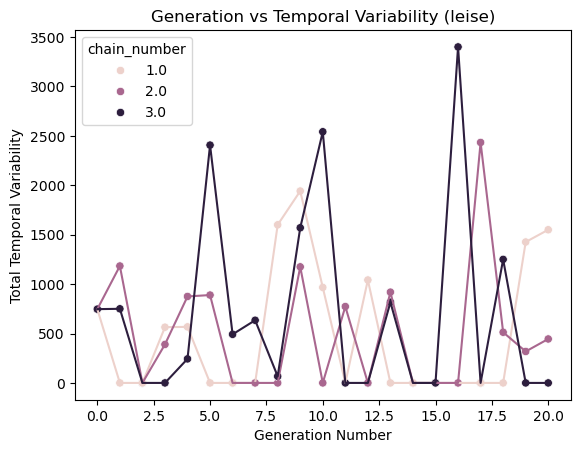

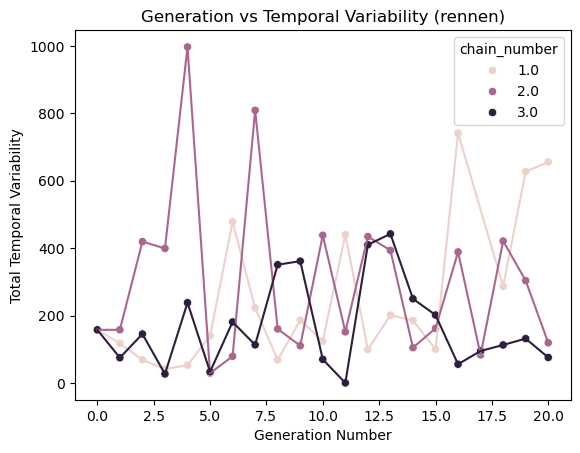

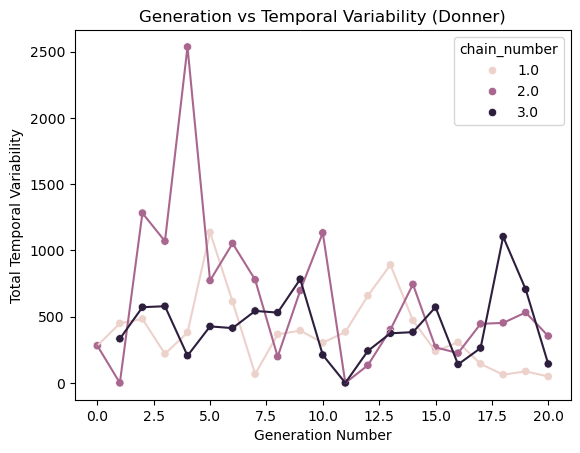

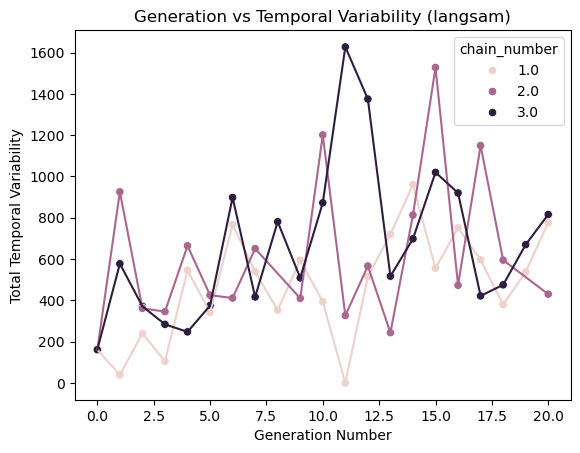

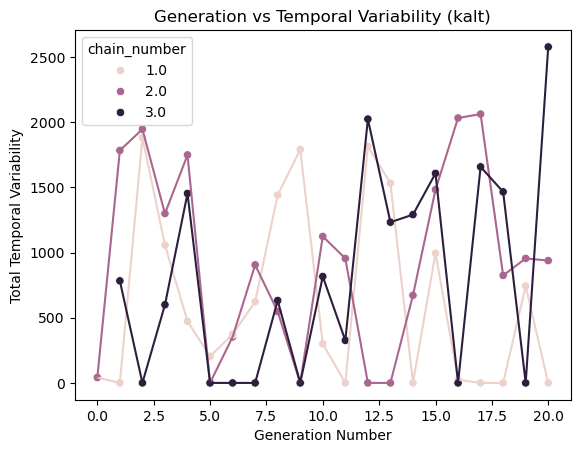

In [21]:
sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], 
                x="generation_number", 
                y="total_body_entropy2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'leise'], 
             x="generation_number", 
             y="total_body_entropy2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Entropy')
plt.title('Generation vs Entropy (leise)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'rennen'], 
                x="generation_number", 
                y="total_body_entropy2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'rennen'], 
             x="generation_number", 
             y="total_body_entropy2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Entropy')
plt.title('Generation vs Entropy (rennen)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'Donner'], 
                x="generation_number", 
                y="total_body_entropy2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'Donner'], 
             x="generation_number", 
             y="total_body_entropy2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Entropy')
plt.title('Generation vs Entropy (Donner)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'langsam'], 
                x="generation_number", 
                y="total_body_entropy2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'langsam'], 
             x="generation_number", 
             y="total_body_entropy2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Entropy')
plt.title('Generation vs Entropy (langsam)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'kalt'], 
                x="generation_number", 
                y="total_body_entropy2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'kalt'], 
             x="generation_number", 
             y="total_body_entropy2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Entropy')
plt.title('Generation vs Entropy (kalt)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'leise'], 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'leise'], 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Temporal Variability')
plt.title('Generation vs Temporal Variability (leise)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'rennen'], 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'rennen'], 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Temporal Variability')
plt.title('Generation vs Temporal Variability (rennen)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'Donner'], 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'Donner'], 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Temporal Variability')
plt.title('Generation vs Temporal Variability (Donner)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'langsam'], 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'langsam'], 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Temporal Variability')
plt.title('Generation vs Temporal Variability (langsam)')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features[normed_features["gesture"] == 'kalt'], 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='chain_number')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features[normed_features["gesture"] == 'kalt'], 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='chain_number', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Temporal Variability')
plt.title('Generation vs Temporal Variability (kalt)')

# Show the plot
plt.show()

In [ ]:
normed_features

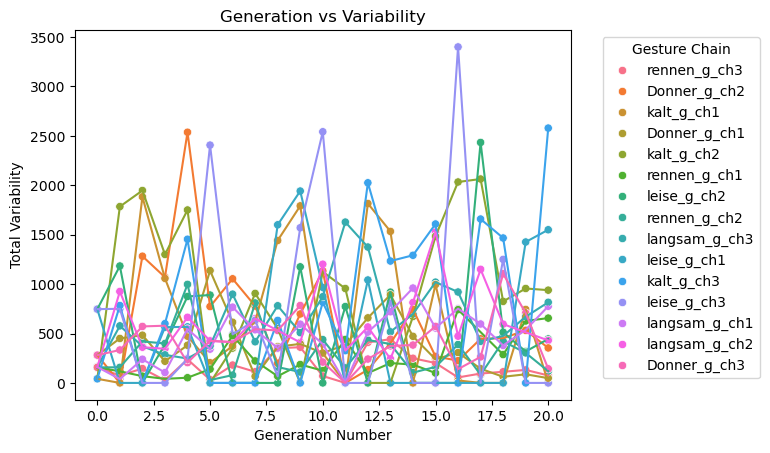

In [12]:
sns.scatterplot(data=normed_features, 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='gesture_chain')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features, 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='gesture_chain', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Variability')
plt.title('Generation vs Variability')

plt.legend(title='Gesture Chain', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features, 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='gesture_chain')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features, 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='gesture_chain', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Variability')
plt.title('Generation vs Variability')

plt.legend(title='Gesture Chain', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

sns.scatterplot(data=normed_features, 
                x="generation_number", 
                y="total_body_variability2Daggregated", 
                hue='gesture_chain')

# Line plot overlaid (this will create a line for each 'chain_number')
sns.lineplot(data=normed_features, 
             x="generation_number", 
             y="total_body_variability2Daggregated", 
             hue='gesture_chain', 
             legend=False)


# Change the axis labels
plt.xlabel('Generation Number')
plt.ylabel('Total Variability')
plt.title('Generation vs Variability')

plt.legend(title='Gesture Chain', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# generation vs gesture space

In [ ]:
sns.scatterplot(data=final_stats, x="generation_number", y="total_gesture_space2D", hue="gesture")

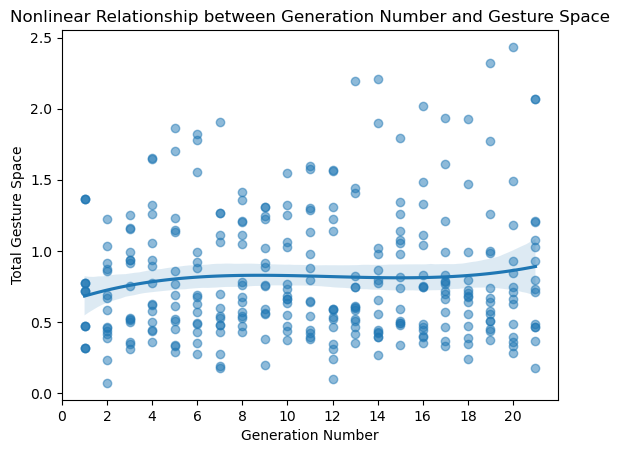

In [41]:
sns.regplot(data=final_stats, 
            x="generation_number", 
            y="total_gesture_space2D", 
            scatter_kws={'alpha': 0.5},  # Scatter plot with transparency
            #line_kws={'color': 'blue'},  # Blue color for the regression line
            ci=95, 
            order=3)  # Confidence interval

# Add labels and title
plt.xlabel("Generation Number")
plt.ylabel("Total Gesture Space")
plt.title("Nonlinear Relationship between Generation Number and Gesture Space")

x_ticks = np.arange(int(normed_features['generation_number'].min()), 
                    int(normed_features['generation_number'].max()) + 1, 2)
plt.xticks(x_ticks)


# Display the plot
plt.show()

# effects of different demographics on this question

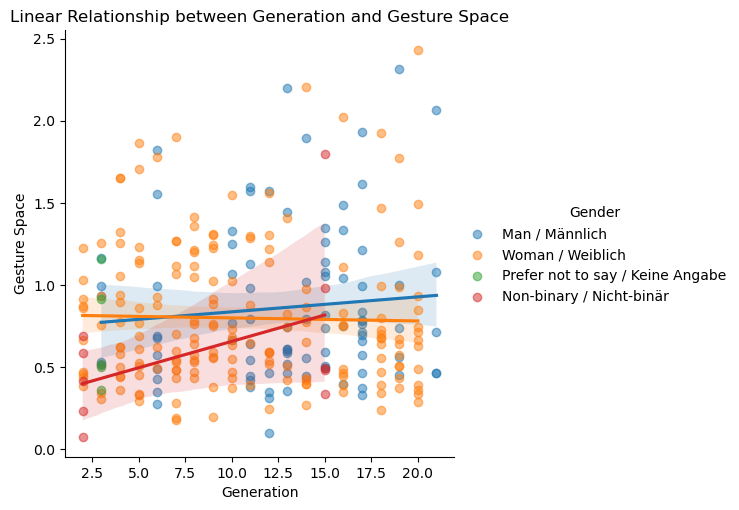

In [29]:
# Assuming 'data' is your DataFrame
sns.lmplot(data=final_stats, 
           x="generation_number", 
           y="total_gesture_space2D", 
           hue="Gender",  # Color by Gender
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Generation")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Generation and Gesture Space")



# Display the plot
plt.show()

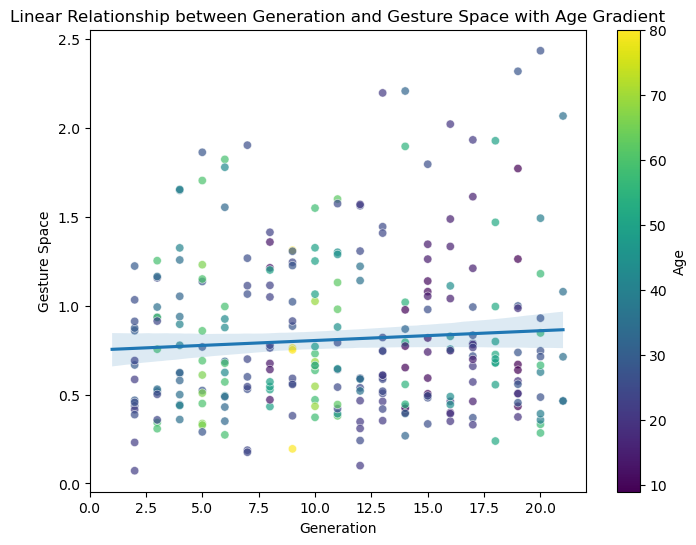

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Assuming 'data' is your DataFrame with a column named 'age'
plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="generation_number", 
                          y="total_gesture_space2D", 
                          hue="Age",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  # Continuous color palette
                          alpha=0.7,  # Transparency for scatter points
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="generation_number", 
            y="total_gesture_space2D", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["Age"].min(), 
                            vmax=final_stats["Age"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Age")

# Add labels and title
plt.xlabel("Generation")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Generation and Gesture Space with Age Gradient")


# Show the plot
plt.show()


# Generation vs Entropy

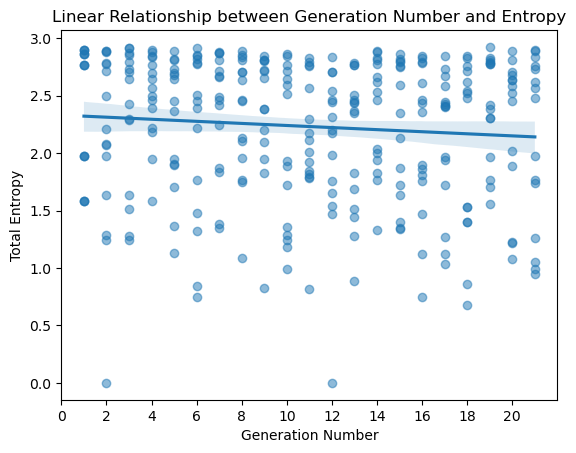

In [42]:
sns.regplot(data=final_stats, 
            x="generation_number", 
            y="total_body_entropy2Daggregated", 
            scatter_kws={'alpha': 0.5},  # Scatter plot with transparency
            #line_kws={'color': 'blue'},  # Blue color for the regression line
            ci=95)  # Confidence interval

# Add labels and title
plt.xlabel("Generation Number")
plt.ylabel("Total Entropy")
plt.title("Linear Relationship between Generation Number and Entropy")

x_ticks = np.arange(int(normed_features['generation_number'].min()), 
                    int(normed_features['generation_number'].max()) + 1, 2)
plt.xticks(x_ticks)


# Display the plot
plt.show()

## effects of different demographics on this question

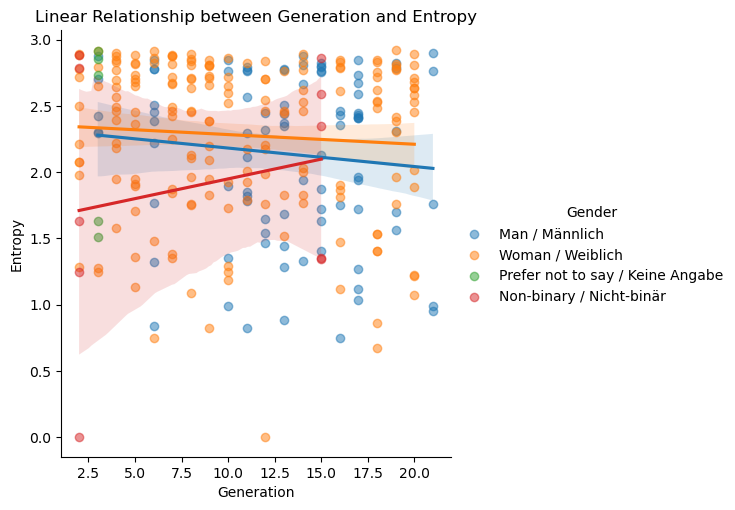

In [61]:
sns.lmplot(data=final_stats, 
           x="generation_number", 
           y="total_body_entropy2Daggregated", 
           hue="Gender",  # Color by Gender
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Generation")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Generation and Entropy")

# show plot
plt.show()

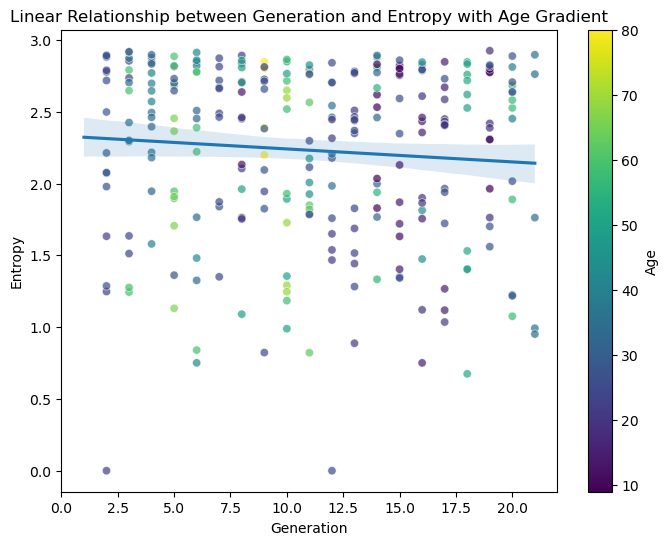

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="generation_number", 
                          y="total_body_entropy2Daggregated", 
                          hue="Age",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="generation_number", 
            y="total_body_entropy2Daggregated", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["Age"].min(), 
                            vmax=final_stats["Age"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Age")

# Add labels and title
plt.xlabel("Generation")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Generation and Entropy with Age Gradient")


# Show the plot
plt.show()

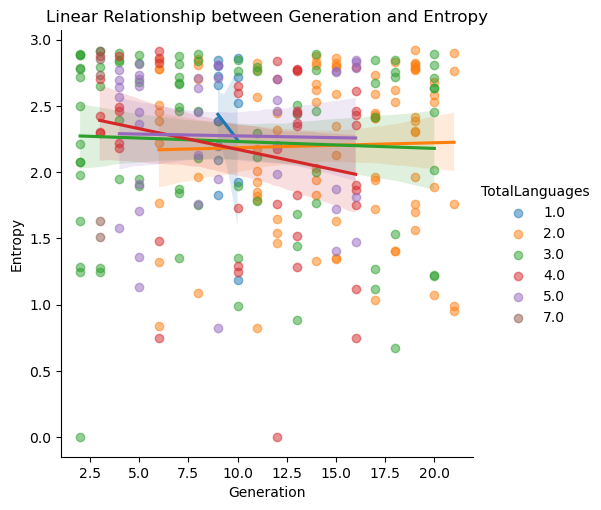

In [62]:
sns.lmplot(data=final_stats, 
           x="generation_number", 
           y="total_body_entropy2Daggregated", 
           hue="TotalLanguages",  # Color by Gender
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Generation")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Generation and Entropy")

# show plot
plt.show()

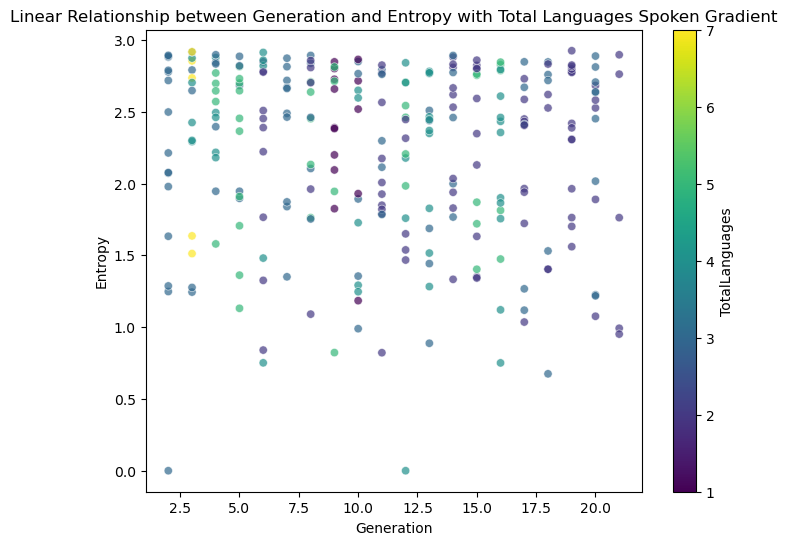

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="generation_number", 
                          y="total_body_entropy2Daggregated", 
                          hue="TotalLanguages",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["TotalLanguages"].min(), 
                            vmax=final_stats["TotalLanguages"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="TotalLanguages")

# Add labels and title
plt.xlabel("Generation")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Generation and Entropy with Total Languages Spoken Gradient")


# Show the plot
plt.show()

# Generation vs Temporal Variability

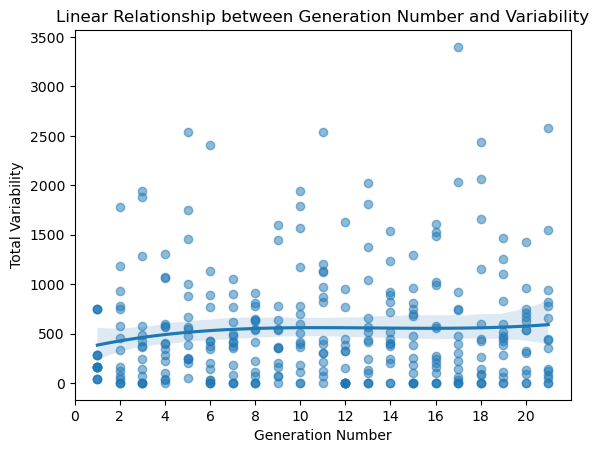

In [45]:
sns.regplot(data=final_stats, 
            x="generation_number", 
            y="total_body_variability2Daggregated", 
            scatter_kws={'alpha': 0.5},  # Scatter plot with transparency
            #line_kws={'color': 'blue'},  # Blue color for the regression line
            ci=95)  # Confidence interval

# Add labels and title
plt.xlabel("Generation Number")
plt.ylabel("Total Variability")
plt.title("Linear Relationship between Generation Number and Variability")

x_ticks = np.arange(int(normed_features['generation_number'].min()), 
                    int(normed_features['generation_number'].max()) + 1, 2)
plt.xticks(x_ticks)


# Display the plot
plt.show()

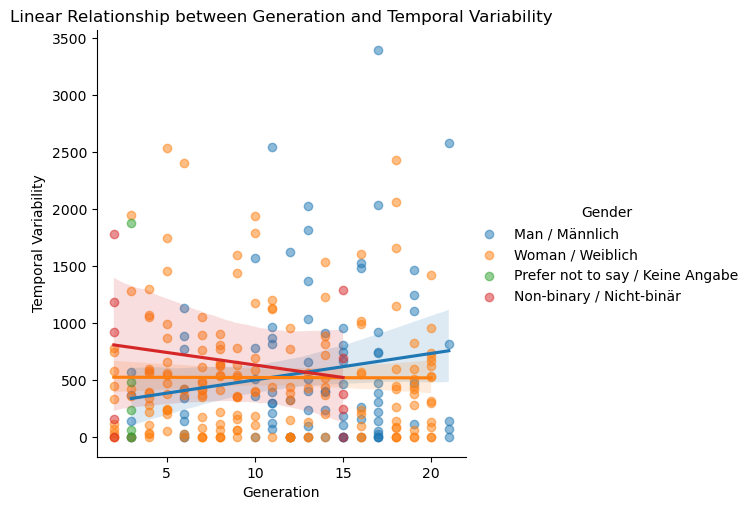

In [64]:
sns.lmplot(data=final_stats, 
           x="generation_number", 
           y="total_body_variability2Daggregated", 
           hue="Gender",  # Color by Gender
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Generation")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Generation and Temporal Variability")

# show plot
plt.show()

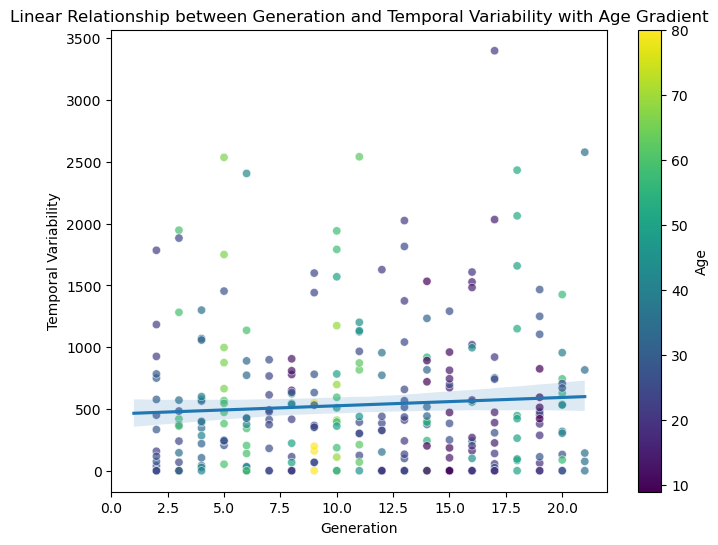

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="generation_number", 
                          y="total_body_variability2Daggregated", 
                          hue="Age",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="generation_number", 
            y="total_body_variability2Daggregated", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["Age"].min(), 
                            vmax=final_stats["Age"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Age")

# Add labels and title
plt.xlabel("Generation")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Generation and Temporal Variability with Age Gradient")


# Show the plot
plt.show()

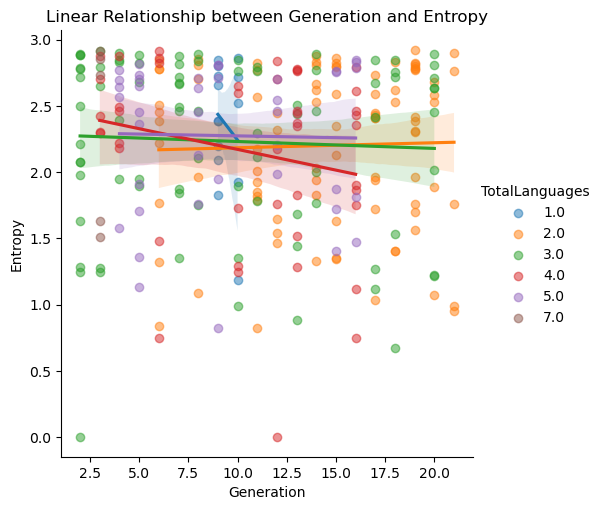

In [65]:
sns.lmplot(data=final_stats, 
           x="generation_number", 
           y="total_body_entropy2Daggregated", 
           hue="TotalLanguages",  # Color by Gender
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Generation")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Generation and Entropy")

# show plot
plt.show()

# General Demographic Questions - Part two

## Age

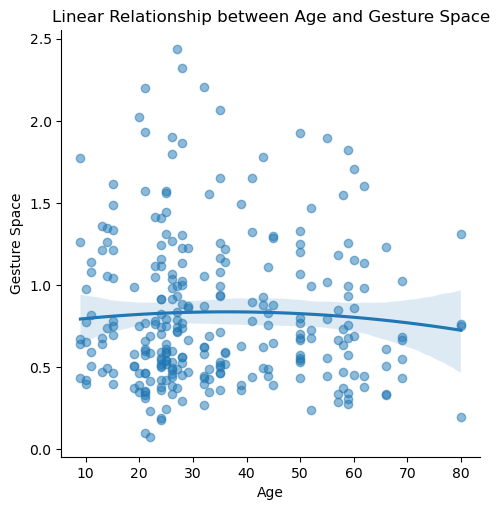

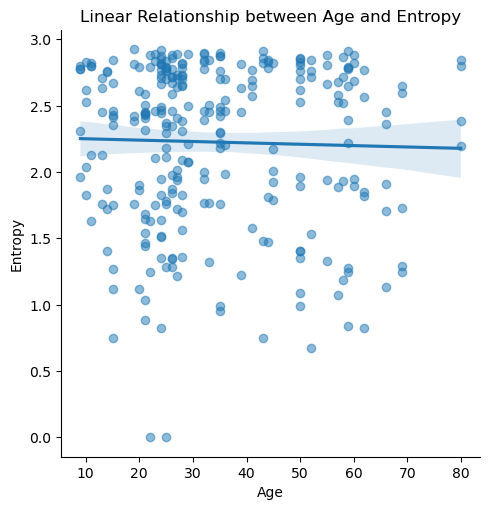

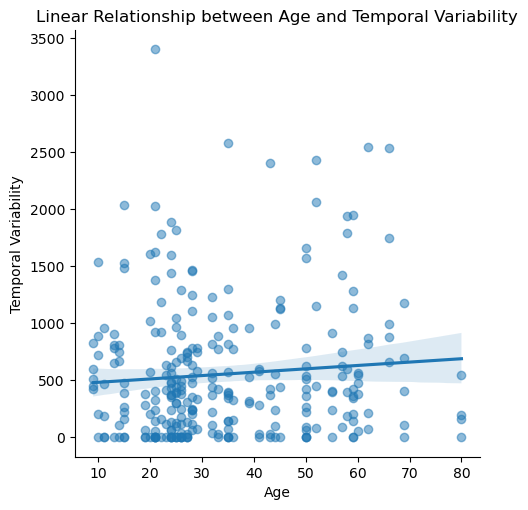

In [108]:
sns.lmplot(data=final_stats, 
           x="Age", 
           y="total_gesture_space2D", 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95, 
           order = 2)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Age and Gesture Space")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Age", 
           y="total_body_entropy2Daggregated", 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Age and Entropy")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Age", 
           y="total_body_variability2Daggregated", 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Age and Temporal Variability")

# show plot
plt.show()

Age interactions

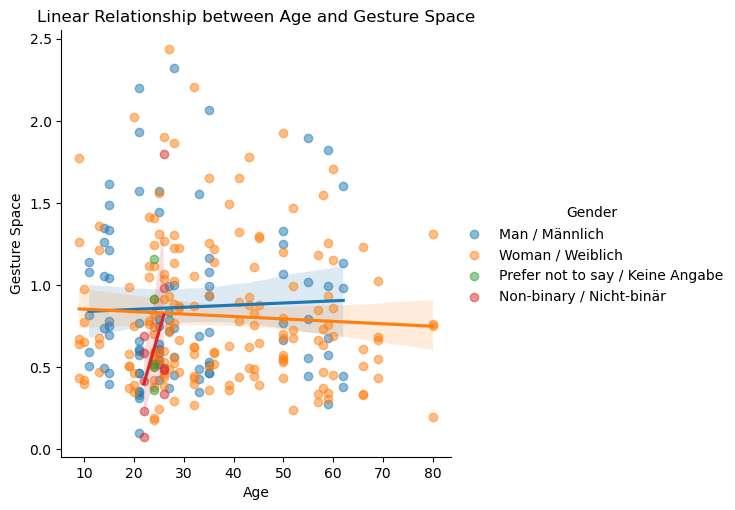

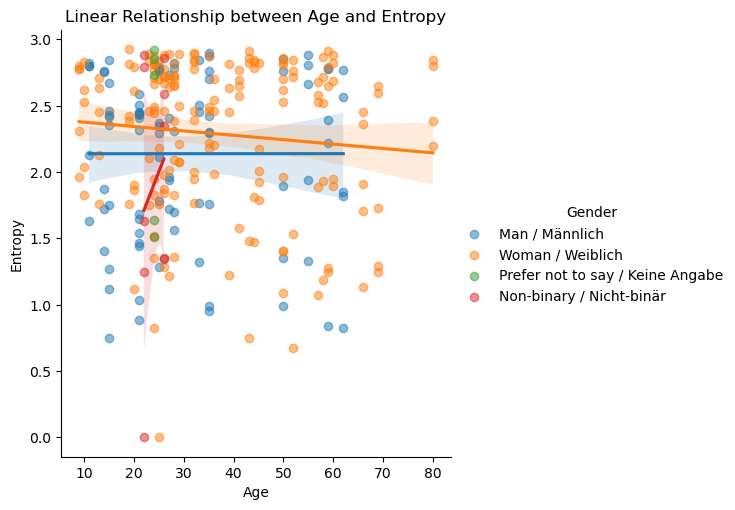

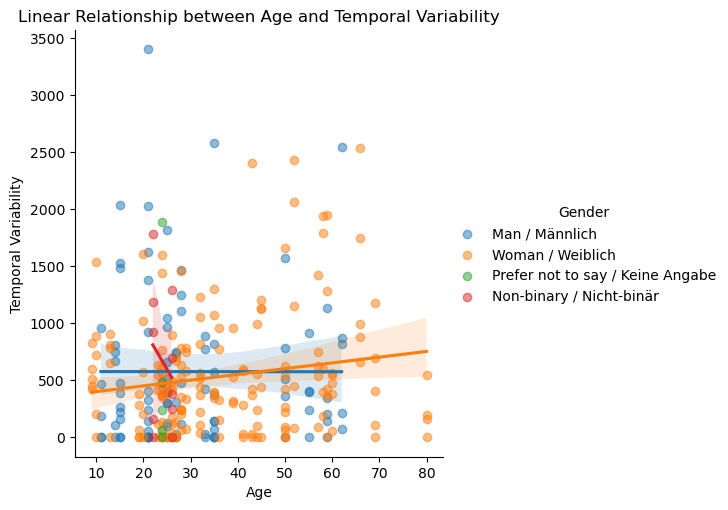

In [100]:
sns.lmplot(data=final_stats, 
           x="Age", 
           y="total_gesture_space2D",
           hue = 'Gender', 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Age and Gesture Space")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Age", 
           y="total_body_entropy2Daggregated",
           hue = 'Gender', 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Age and Entropy")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Age", 
           y="total_body_variability2Daggregated",
           hue = 'Gender', 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Age and Temporal Variability")

# show plot
plt.show()

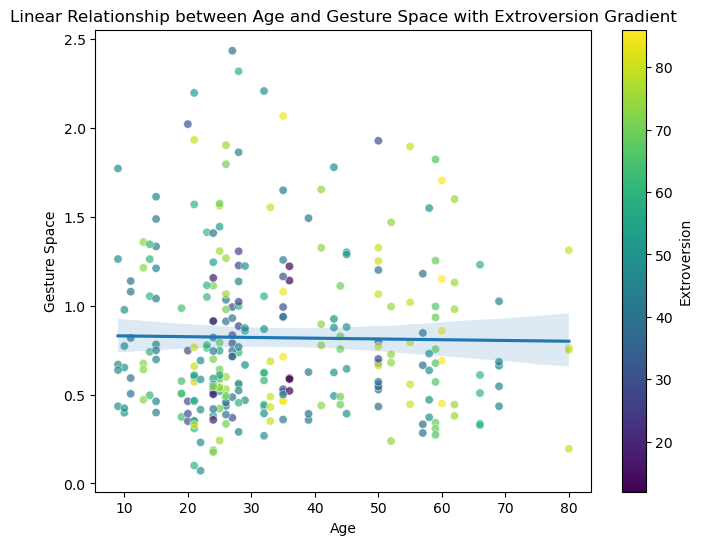

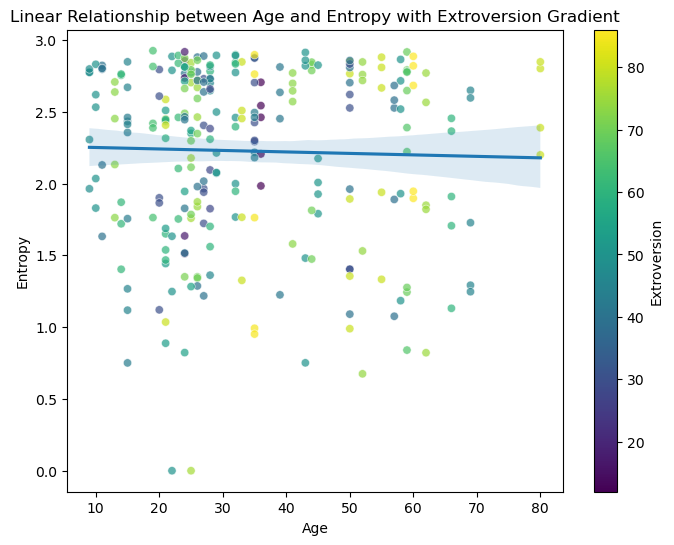

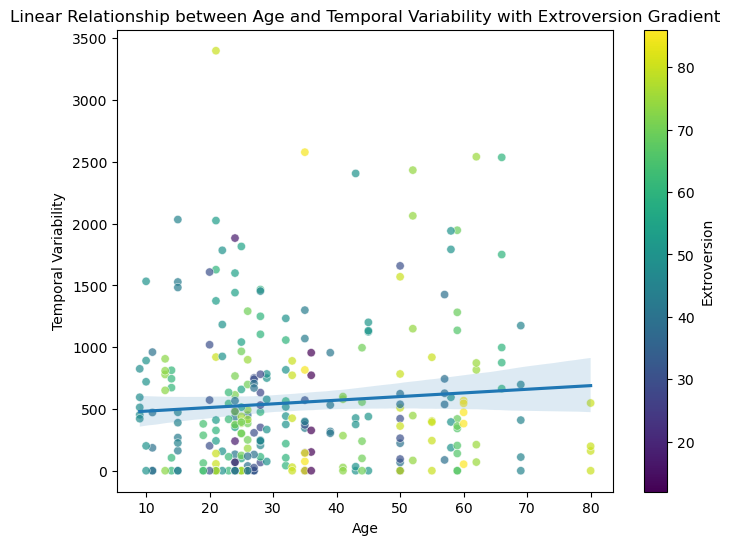

In [99]:
plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="Age", 
                          y="total_gesture_space2D", 
                          hue="Extroversion",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="Age", 
            y="total_gesture_space2D", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["Extroversion"].min(), 
                            vmax=final_stats["Extroversion"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Extroversion")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Age and Gesture Space with Extroversion Gradient")


# Show the plot
plt.show()

#### 
## ENTROPY
plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="Age", 
                          y="total_body_entropy2Daggregated", 
                          hue="Extroversion",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="Age", 
            y="total_body_entropy2Daggregated", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["Extroversion"].min(), 
                            vmax=final_stats["Extroversion"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Extroversion")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Age and Entropy with Extroversion Gradient")


# Show the plot
plt.show()

## Temporal variability
plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="Age", 
                          y="total_body_variability2Daggregated", 
                          hue="Extroversion",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="Age", 
            y="total_body_variability2Daggregated", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["Extroversion"].min(), 
                            vmax=final_stats["Extroversion"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Extroversion")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Age and Temporal Variability with Extroversion Gradient")


# Show the plot
plt.show()


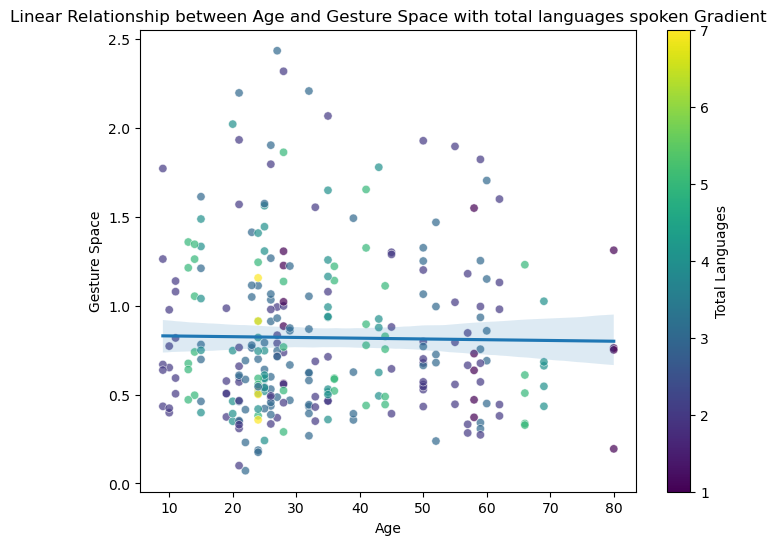

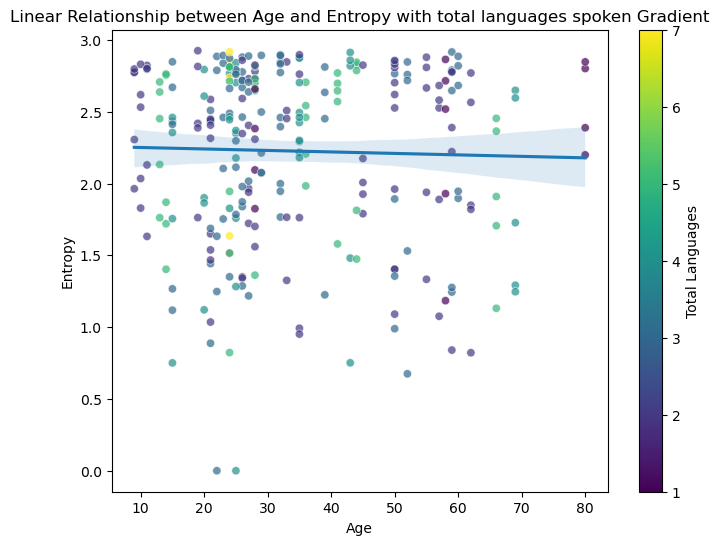

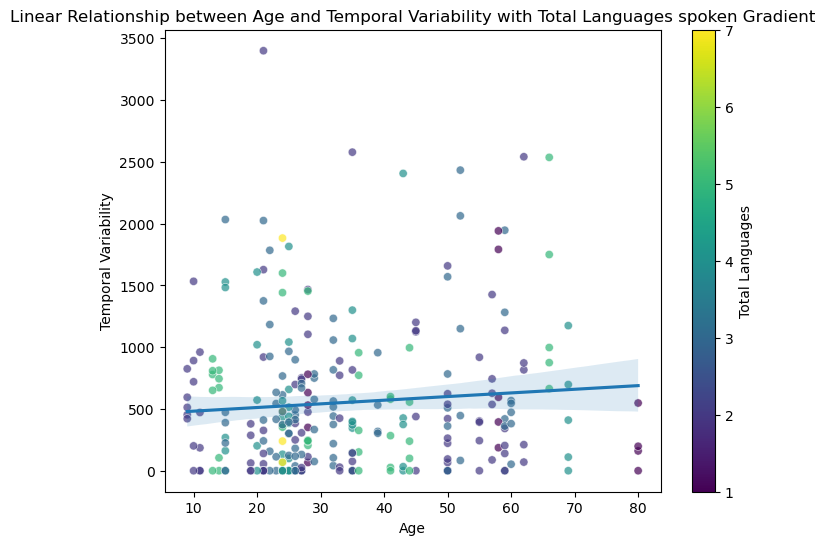

In [103]:
plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="Age", 
                          y="total_gesture_space2D", 
                          hue="TotalLanguages",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="Age", 
            y="total_gesture_space2D", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["TotalLanguages"].min(), 
                            vmax=final_stats["TotalLanguages"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Total Languages")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Age and Gesture Space with total languages spoken Gradient")


# Show the plot
plt.show()

####### ENTROPY

plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')
scatter = sns.scatterplot(data=final_stats, 
                          x="Age", 
                          y="total_body_entropy2Daggregated", 
                          hue="TotalLanguages",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="Age", 
            y="total_body_entropy2Daggregated", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["TotalLanguages"].min(), 
                            vmax=final_stats["TotalLanguages"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Total Languages")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Age and Entropy with total languages spoken Gradient")


# Show the plot
plt.show()

## TEMPORAL VARIABILITY
plt.figure(figsize=(8, 6))

# Scatter plot with a continuous hue (color gradient based on 'age')

scatter = sns.scatterplot(data=final_stats, 
                          x="Age", 
                          y="total_body_variability2Daggregated", 
                          hue="TotalLanguages",  # Use 'age' as the continuous variable for hue
                          palette="viridis",  
                          alpha=0.7, 
                          legend=None)  # No legend for continuous color mapping

sns.regplot(data=final_stats, 
            x="Age", 
            y="total_body_variability2Daggregated", 
            scatter=False)  # Don't plot scatter points again
            #line_kws={"color": "black", "lw": 2})  # Line style for regression line

# Create a colorbar to show the gradient of the continuous hue
norm = mpl.colors.Normalize(vmin=final_stats["TotalLanguages"].min(), 
                            vmax=final_stats["TotalLanguages"].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])  # Empty array as we're using the mappable for the color scale

# Add the colorbar to the plot
scatter.figure.colorbar(sm, ax=scatter.axes, label="Total Languages")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Age and Temporal Variability with Total Languages spoken Gradient")


# Show the plot
plt.show()

# Extroversion

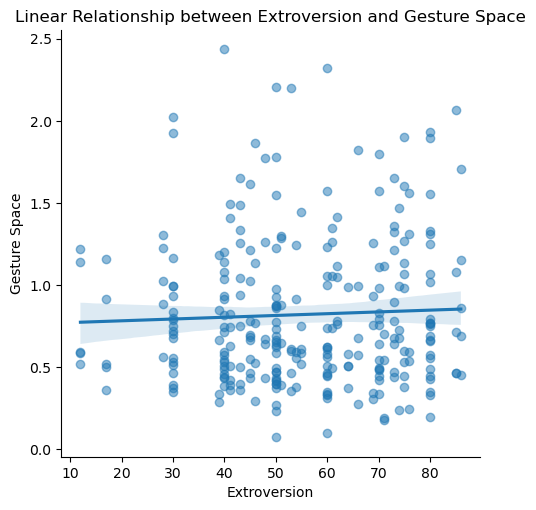

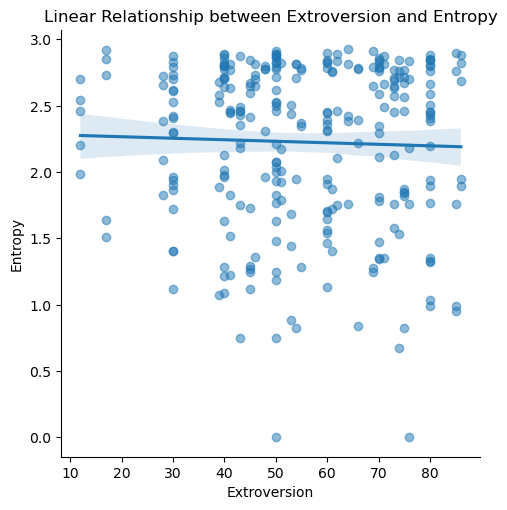

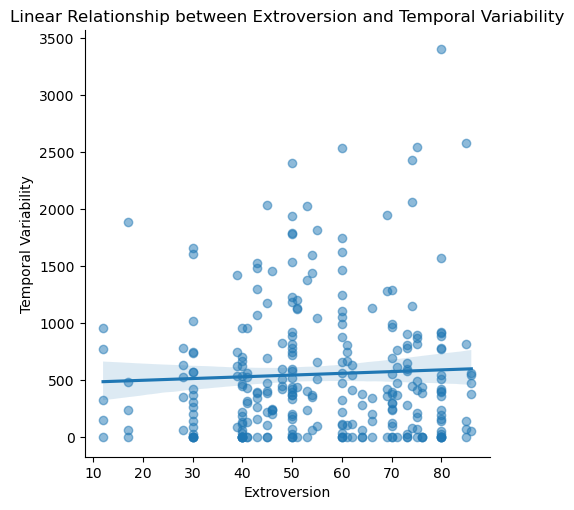

In [105]:
sns.lmplot(data=final_stats, 
           x="Extroversion", 
           y="total_gesture_space2D", 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Extroversion")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Extroversion and Gesture Space")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Extroversion", 
           y="total_body_entropy2Daggregated", 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Extroversion")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Extroversion and Entropy")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Extroversion", 
           y="total_body_variability2Daggregated", 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Extroversion")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Extroversion and Temporal Variability")

# show plot
plt.show()

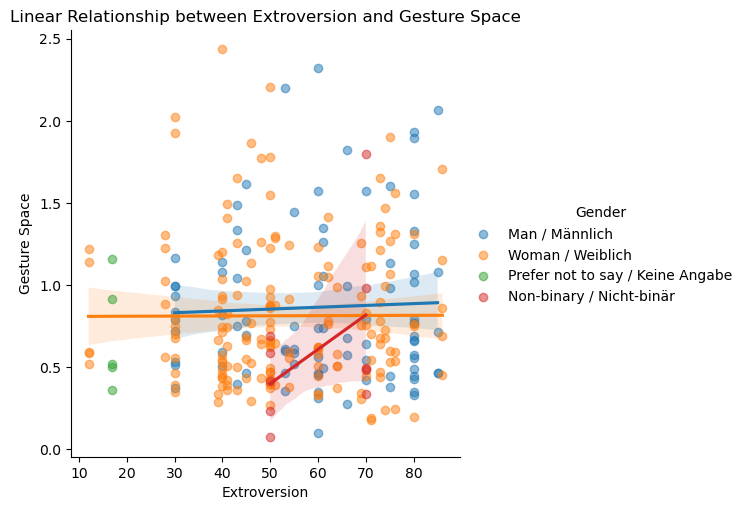

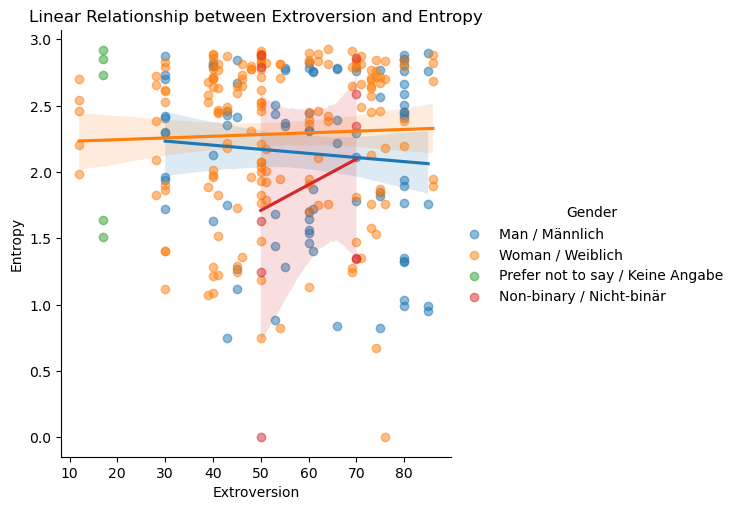

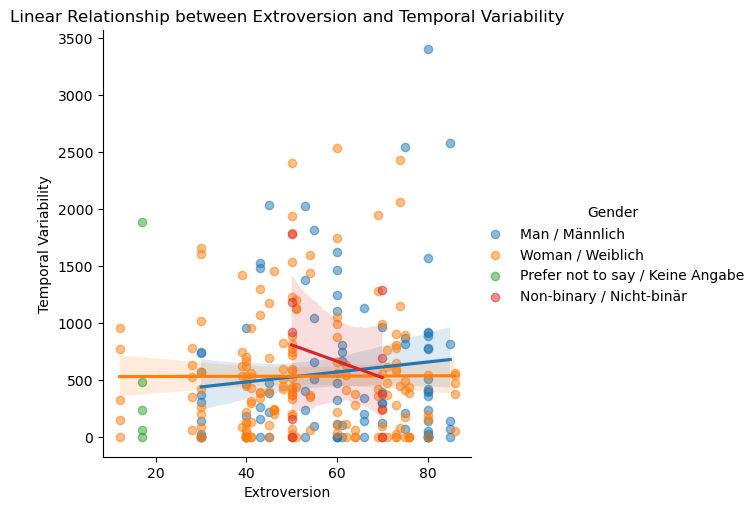

In [106]:
sns.lmplot(data=final_stats, 
           x="Extroversion", 
           y="total_gesture_space2D",
           hue = 'Gender', 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Extroversion")
plt.ylabel("Gesture Space")
plt.title("Linear Relationship between Extroversion and Gesture Space")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Extroversion", 
           y="total_body_entropy2Daggregated",
           hue = 'Gender', 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Extroversion")
plt.ylabel("Entropy")
plt.title("Linear Relationship between Extroversion and Entropy")

# show plot
plt.show()

sns.lmplot(data=final_stats, 
           x="Extroversion", 
           y="total_body_variability2Daggregated",
           hue = 'Gender', 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Extroversion")
plt.ylabel("Temporal Variability")
plt.title("Linear Relationship between Extroversion and Temporal Variability")

# show plot
plt.show()

# Gender

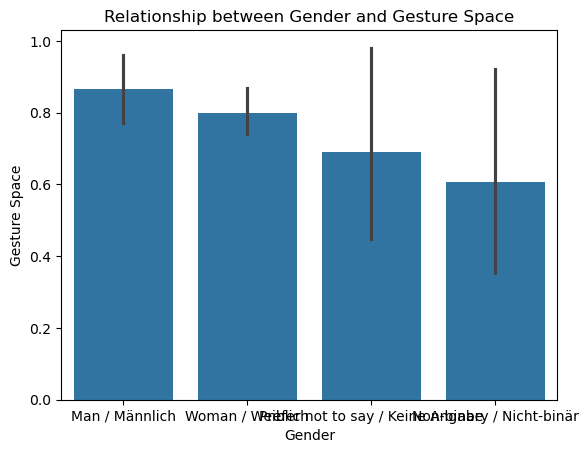

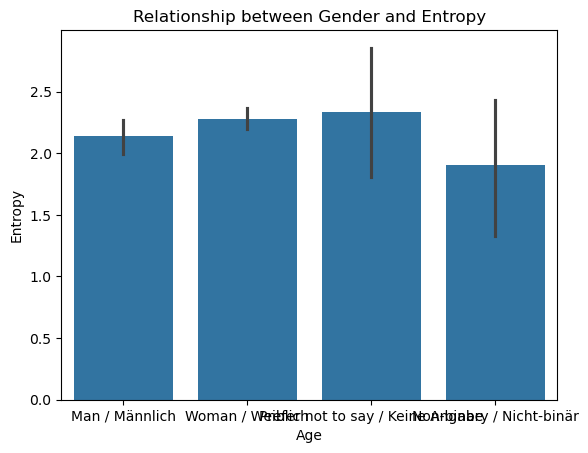

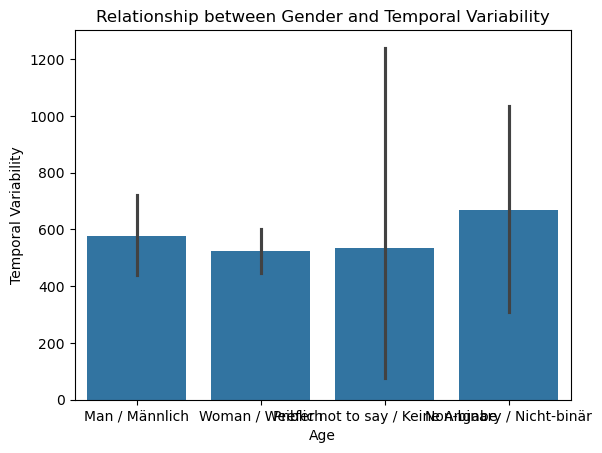

In [117]:
sns.barplot(data=final_stats, 
           x="Gender", 
           y="total_gesture_space2D", 
)

# Set labels and title
plt.xlabel("Gender")
plt.ylabel("Gesture Space")
plt.title("Relationship between Gender and Gesture Space")

# show plot
plt.show()

sns.barplot(data=final_stats, 
           x="Gender", 
           y="total_body_entropy2Daggregated", 
)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Entropy")
plt.title("Relationship between Gender and Entropy")

# show plot
plt.show()

sns.barplot(data=final_stats, 
           x="Gender", 
           y="total_body_variability2Daggregated", 
)  

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Temporal Variability")
plt.title("Relationship between Gender and Temporal Variability")

# show plot
plt.show()

In [ ]:
final_stats

# PART THREE: RATE OF EVOLUTION

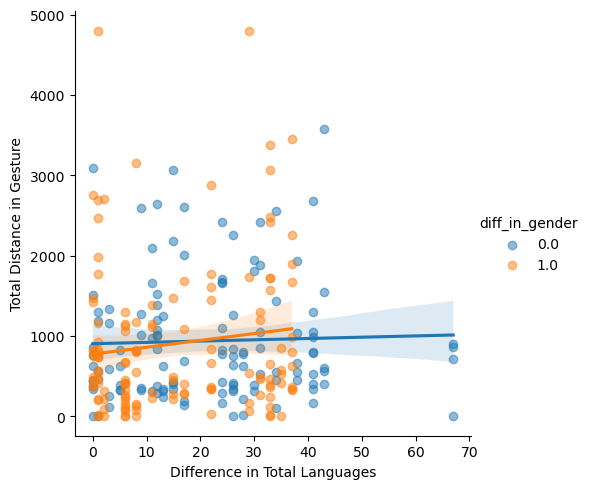

In [125]:
sns.lmplot(data=final_stats, 
           x="diff_in_age", 
           y="total_distance",
           hue = 'diff_in_gender', 
           logistic=False,  
           scatter_kws={'alpha': 0.5},  
           ci=95)  

# Set labels and title
plt.xlabel("Difference in Total Languages")
plt.ylabel("Total Distance in Gesture")
#plt.title("")

# show plot
plt.show()